In [4]:
%matplotlib inline
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

import seaborn as sns
import pandas as pd
import matplotlib.cm as cm
import datetime

plt.rcParams['figure.figsize'] = [14, 10]
plt.rcParams.update({'font.size': 16})

In [5]:
#column_names = ['timeA','VA']
#dataA = pd.read_csv('A/CH3.CSV', skiprows=1, names=column_names)
#column_names = ['timeAgen','VAgen']
#dataAgen = pd.read_csv('A/CH1.CSV', skiprows=1, names=column_names)


data = pd.DataFrame()
data = pd.read_table('20180813/0_0.txt',names = ['time'],sep = '\t', header=None, usecols=[0])
data['time'] = data['time']*1e6

frames=[]
indexes = np.linspace(0,9,10,dtype=int)
 
for i in indexes:
    location = '20180813/0_'+str(i)+'.txt'
    #timelabel = 'time_'+str(i)
    vlabel = 'V_'+str(i)
    dataA = pd.read_table(location,names=[vlabel],sep='\t',header=None,usecols=[2])
    dataA[vlabel] = dataA[vlabel]*1e3
    frames = [data,dataA]
    data=pd.concat(frames,axis=1)
        
col_list = list(data)
col_list.remove('time')
data['V_avg'] = data[col_list].mean(axis=1)
data = data.drop(col_list,axis=1)
data = data[(data.time>-25) & (data.time<150)]

#print(col_list)

data['V_avg'] = data['V_avg'] - data[data.time<0].V_avg.median()
data[data.time<0].V_avg.median()


0.0

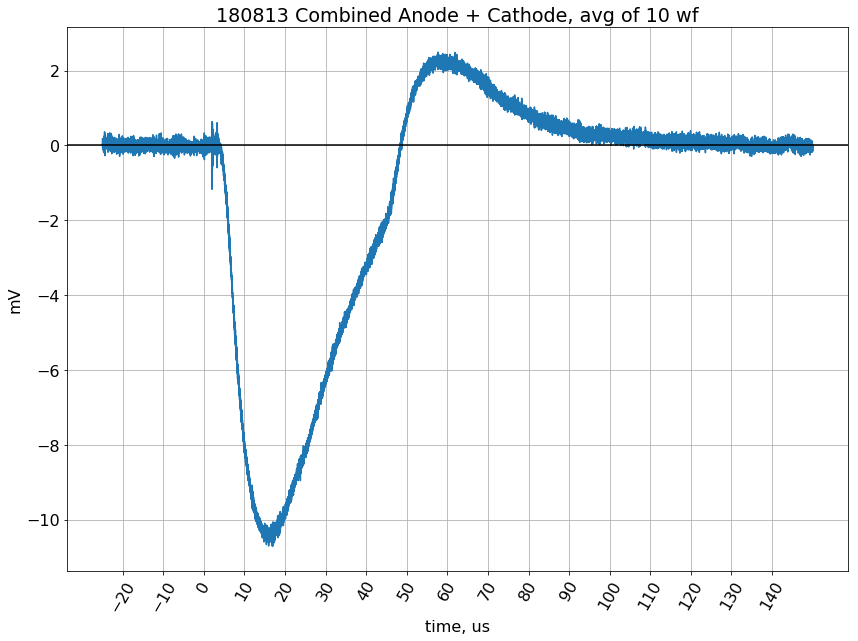

In [535]:
plt.plot(data.time,data.V_avg)
#plt.plot(data.time,data.V_1)
plt.axhline(data[data.time<0].V_avg.median(),c='k')
plt.xlabel('time, us')
plt.ylabel('mV')
plt.title('180813 Combined Anode + Cathode, avg of 10 wf')
plt.xticks(np.arange(-20, 150, step=10),rotation=60);
plt.grid();
#plt.savefig('combined_anode_cathode.png')

31250

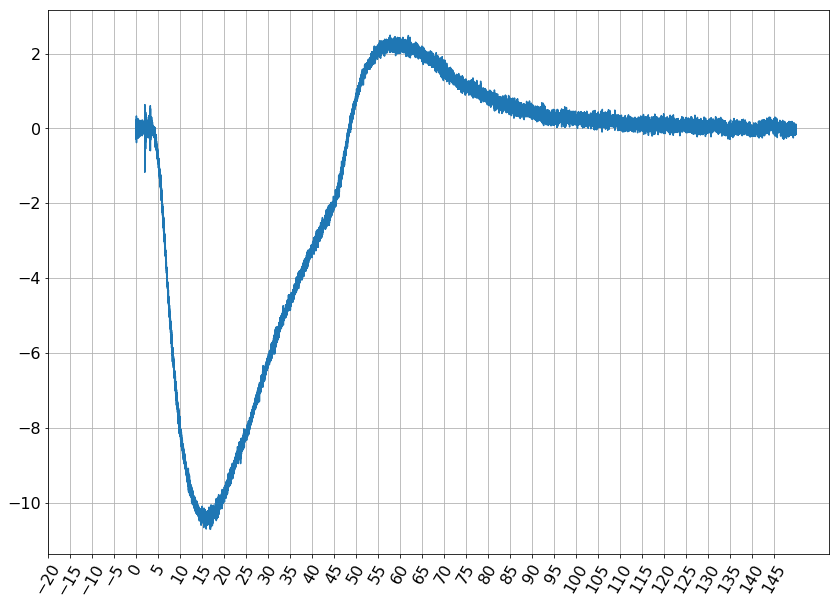

In [403]:
FitData = data[(data.time>0)&(data.time<150)]
#FitData = FitData.iloc[::10,:]

#FitData['logadj'] = np.log(FitData['V_avg'] - FitData.V_avg.min()+1)
plt.plot(FitData.time, FitData.V_avg)
#plt.plot(FitDadata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAA0cAAAJdCAYAAAD5gAzKAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMi4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvhp/UCwAAIABJREFUeJzs3Xd4VGXexvH7pJMEEkroJfQOUpTei5S1u7ZXd9VVV117xbq4oqKuXbGtK2tdsS0qCIJUqdKlSwm91/R63j8GJpnMTDJJJnPOTL6f68rlzDlPnrnBkMwvTzNM0xQAAAAAVHVhVgcAAAAAADugOAIAAAAAURwBAAAAgCSKIwAAAACQRHEEAAAAAJIojgAAAABAEsURAAAAAEiiOAIAAAAASRRHAAAAACBJirA6QEUlJiaarVq18nu/6enpiouLo1/6pV/6pV/6pV/6pV/6pd8gt3LlyqOmaSaV2tA0zaD+aNOmjVkZ5s6dS7/0S7/0S7/0S7/0S7/0S78hQNIK04fagml1AAAAACDWHAEAAACAJIojAAAAAJBEcQQAAAAAkiiOAAAAAEASxREAAAAASKI4AgAAAABJFEcAAAAAIIniCAAAAAAkURwBAAAAgCSKIwAAAACQRHEEAAAAAJIojgAAAABAEsURAAAAAEiiOAIAAAAASRRHAAAAACCJ4ggAAAAAJFEcAQAAAIAkiiMAAAAAkERxBAAAAACSKI4AAAAAQBLFEQAAAABIojgCABSxcf9pzd54qML9FBSYOp6e44dEAAAEDsURAMBpzOsLddNHK1yumaYp0zTL1M9Ls7ao+9OzdDQt25/xAACoVBRHAABJ0gkvIz19npujc5+ZLUlavvO4cvMLXO5vOZjqVgTNOjP6tOVgqrYcTK2EtAAA+F+E1QEAAPZw8aRFzsdvzvlddwxtrRdmbNbB01mSpPHfbdDkxSnONl2SwjV4sHT+qwskSSkTxzrvbT2UJkn6v38tc7sHAIBdURwBQBX1v9X71K1pohZsPaJrezfTrmMZznv//Gmr1u495RwBkuRSGEnSuiP5+u/y3c7nBQWmDpzOUv0aMZWeHQCAykBxBABV0L6TmbrnizXO509M3eDWZpYPGzOM++Y35+MWj06XJF18TkM/JAQAIPAojgCgCuj61E+qVyNa1SLD1alRgj5dtrv0Tyqn/63ZX2l9AwBQmdiQAQCqgFOZudp6KE1r956q1MLIm80HTzsfm6apd+Zv1+HUrIDnAACgJBRHABDi5uzOtTqCRr260Pl4zubDmvjjZp33zM86eIoCCQBgH0yrA4AQ99FGexzGeuPkX7XlYKr2ncx0Xuv93M9a+fhw1Y6PtjAZAAAOjBwBQIjKzS/Q1e8ttTqG05zNh10Ko7Pu/3KtBWkAAHBHcQQAIWTviQy9MmurcvIKNGP9QS3ZcczqSKWat+WIlp7J+emyXTqSUVDKZwAAUDmYVgcAIeTq95dqz/FMfbpsl46m2WM6nS/u+GyVPr+5tx77dr0MSZEN9unibo2sjgUAqGIYOQKAEHIi3bH5QjAVRpIj74hXFkiSTEn3fLFGs304ZwkAAH+yvDgyDONywzC+Ngxjl2EYmYZhbDEM4znDMKpbnQ0Agk1adp7VEfzmpo9WWB0BAFDFWF4cSXpAUr6kRyWNkvS2pNskzTIMww75ACAoFBSYVkfwu6LnIwEAUNnsUHxcYJrmFaZpfmqa5nzTNF+VdJekXpIGWxsNAIJDfoGprLz8CvXRrHasn9L4z6hXF2rXsXSZpqPwW7f3pC544xelZll/dhMAIPRYviGDaZpHPFz+9cx/WY0LAD5o+ej0CvfxypXn6NJJi/2Qxr8GvThP1/ZuqsycAm0+eFob9p9W5/E/6atb+6hnci2r4wEAQogdRo48GXTmv5ssTQEAQeBwalaF+wgzpCY1C0eO3rm2h0+fd8vAFhV+bV98snS3vl61Vxv2F06ze2HmFp1Id2w8Mf67DUoeNy0gWQAAocvykaPiDMNoJOkfkmabpslqXAAoxXnP/Fym9hFhhvLOrE+qFhmujg1r6JEx7ZVUPVo7nh0jw5AMw9COZ8dIkhZuO6o//3u5x74u695Yj45pr69W7lV2Xr4e+3Z9xf4wZbB853F1e3qWUiaO1eTFKQF7XQBA6DLOzuO2A8Mw4iXNk9RQ0nmmae710u4WSbdIUlJSUo8pU6b4PUtaWpri4+Ppl37pl35t3+/1M9LL1P7J3jH6x1LHaFPvBuG6tWtMie03HM3XiyuylBBt6Lr2UWpXK1wxEdKRk+lqUMs1b1mz+MPrQ2N115wMSdLkUXFe29nt/xv90i/90m9V6dcOhgwZstI0zZ6ltbPNyJFhGDGSvpPUQtIgb4WRJJmm+Z6k9ySpbdu25uDBg/2eZ968eaJf+qVf+g2KfmeUbTrZJSMG6B9LZ0mS6terp8GDu5XYvu7+03pxxUJd3L2pHriok/O6x7xesgxrV1fPXtpZh05n6cI3F5Upb2kWnKolyVEcXT8jXRMu7qRrezdza2e7/2/0S7/0S79VpN9gYos1R4ZhREr6WtJ5ksaYpvmbxZEAIChk5ZZth7rh7euqZlyUfrp3oLo2TtAjY9qX+jkdGtbQZzf30qNjS2/bKLGaosLD9H+9mrpcf+aSzqpXI0ZdGieWKa8vvlrp+ru0x//nmNqXkZOn+6esZS0SAMBnlo8cnTnL6FNJwySNNU1zqcWRACBotHtiRqltBjeJ0Lw9Zw+HNSRJbepV19Q7+vv8On1b1vGp3YKHhji33e7WtKYe+HKtJCk8zHC2efXKc3TPF2vUuVGCftt3yucMZfGfxSn6aEmKth8J/DQ/AEDwsrw4kvSWpD9KekZSumEYvYvc21vS9DoAqKqycvP18qytPrVtUzNcT1zRT8Nemq+/9G9eqbkcRZCjELq8R2P1a1VbP286rKTq0c42F3drpIFtkhQXHa6r31uqVbtPqlfzWlq287jfcvz9uw1+6wsAUHXYYVrd6DP/fUzSkmIfN1kVCgDs7O7/rtZ7C3aU2Ob8jvUkSa0Sw9QyKV4pE8eqT8vagYjn1CChmsf1P7XiohQdEa43rumu2wa31Kc39dK0u3wfySqri978Rd/+nqNNB06X3hgAUGVZXhyZpplsmqbh5WO81fkAwI5mbjhUapsHRrZVysSxqhtr+bd6rxolVtPDo9opIjxMHRsmVNrrrN17SlO35+qSSf7dDAIAEFrs+xMTAOBRZo5vmzC0rle9kpMEn/wC+xxfAQCwH4ojAAgi2Xn5av9k6ZswBKsljwyt1P5z803N3XJYp7NyK/V1AADBieIIAILE1yv3qu3jvhVG3Zr6f8vsQGiQUM35+P0/9dQjo9vp4nMa+vU1bvjwV/3t01V+7RMAEBrssFsdAKAUpmnq/jPbYpfm5Su6ami7upWcqPL0rBeuFYfyNaJDPUmOTSXqJcTo3fklb0BRFpsPpvqtLwBA6KA4AoAgsOmAb2/mdz43RoZhlN7Qxm7rGq3e/Qa4XHvo/HZ+LY6OpGb7rS8AQOigOAKAIJCbX1Bqmxcu6xL0hZHkOCspLjrC7VrKxLGSpEOns9Tr2Z/98lo5eQVavvO4+rf27ZBbAEBoozgCgBDxx56NrY4QEPVqxPiln5s/WqFZGx1bon97e191a1rTL/0CAIIXGzIAgI3lF5j6cNFOXfRWyefzpEwcGxKjRr5KmTjW+VFeZwsjSbpk0mKft0gHAIQuiiMAsLHnZ2zWU99vLLHNoDZJAUoT2ka/toC1SABQxTGtDgBsbOaGg17v7Xh2jMLCqs5oUWVLOZaha95fqln3DbI6CgDAIowcAYCN7TqW4fUehZHDRzee53x8be+mFerr98NpyvNh8wsAQGiiOAIAmzqcmmV1hKAwsE2S/n19T0nS8Pb1Ktxf8fOkTmXkKr/ArHC/AAD7ozgCAJs6kZ7r9d7NA5oHMIn9DW1XT8sfG6bBbevqs5t7VaivqWv2S5JmrD+gE+k56vqPn/Ts9E3+iAkAsDmKIwCwqb99tsrj9T/3aaaHR7ULcBr7q1vdscV335Z1dHmPim1r/vyMzbr1k1Xq9vQsSdK0dQcqnA8AYH8URwBgU9sOp3m8/rchrRQRzrfvkjx3aecKff7b87a7PD94OkszNxzU5EU7lTxuGtPsACBE8dMVAIJMdES41RFsL7ISise/frxS489sq/74/37ze/8AAOtRHAGADc0uckCpGzap88mPdw+otL4/X76n1DZvzd2mj5akVFoGAID/URwBgA3d9NEKj9ev6NlYCdUiA5wmOLVvUEPvXdej0vo/lpatB79cq/VH8zzef3HmFj05dUOlvT4AwP8ojgAgSPx1UAu9cHlXq2MElZEd6ys+2nHe+R3nRPu17x4TZuvLlXv1zxXZLtfnbD6k5HHT3NofTs1SVm6+XzMAAPyL4ggAgsSAVklWRwhKdw9rLUmqFxemdeNHVsprfLVyr8a8tlA3f7RCN052HfU7kZ4jSTrvmZ91c5ERwalr9ulUpvft2gEAgUdxBAA2w+iCf900oLkWPjRETaqHKarIRg114qP89hoPfLlWGw+c1iwPa8WGvjRPK3cdlyQt/P2oJGnb4VTd/d81un/KGr9lAABUHMURANjMyFcWWB0hpBiGoSa1YiVJMZHhmn7XAG38x/nq07KOJOnvF3So1Nc/kZGry95e4nItK7dAkrT/ZFalvjYAoGwojgDAZnYfz7A6Qkjr0LCGYqMinM9rxUXp+zv6W5Jl44HTlrwuAMAziiMAsJGCEg4XDQ9jD29/+uvAFkqoFqn+reqoc+ME3dS/eUBeN+Vouj5dtisgrwUAKJuI0psAAAKlxaPT3a5d17uZIsIN9Wpey4JEoatTowSt/XvhBg3jRrdT1yaJmrv5sL5Zva/SXnfwP+dVWt8AgIqhOAIAG7u0WyM9fXEnq2NUCRHhYbqga0Nd0LWhth9J09q9p6yOBAAIMKbVAYCN3T6kldURqqQPbzgvYIftvjBjsy5/e7EycvKUnu35QFkAQGBQHAGADaRn5+nWWelu1xvXrGZBGtSKi9LqJ0YE5LUmzduuFbtOqMOTM9Xx7zOVmsXZRwBgFYojALCBxduPKcvD8UYxkeGBDwNJUphFG2A88OVa5+Np6w5o88HCHe2OpGZr3NfrlJ3HWVgAUBlYcwQANmCa3nepg3VSJo51Pk4eNy0grzlzwyHtPJqubSfyNWHGKknS17f1VY9mNfX0Dxv13dr96tOyti46p1FA8gBAVcLIEQAANjPkn/M0YVnhAbGXvb1Yh05niRIaACoXxREA2MCsjYfcrv02fqSHlrDK+R3rOR8/fVHHgL9+r2d/1vdr90uSfvLw9QIAqDiKIwCwgS9X7nW7Vj0mMLulwTfvXtdTL/2xqyTpD10autybfteAgGaZtu6AksdN012fr9axtOyAvjYAhDKKIwAAfHRZj8ZKmThWNeOiFB3h+BF6d/dodWhYw5I8363dr2emb/J47/DpLD05db1y8wskSXuOZ6iggIl5AFASNmQAAIt52oxh7gODAx8EZfL61d00ae42dU1ybL19fsd6Oje5lmrEROqhr9cFNMvZ85FiIsN1+6cr1blRgr5bu19bD6Vp84FUTbyss4a+NF/3jWijLmyACABeURwBgMXmbz3idi1QB5Ci/M7vWF/nd6yvefPmSXJMuzvr582HNHNDYNYFfbNqn75ZtU+SdFn3xpq5wfHasVGOKmh5ynHtP+nY3OHlWVv1wcjYgOQCgGDEtDoAsNieE5kuz0d2qKdacVEWpYE/FC2U+rasHbDX/XpV4dq1jJzCs5AKioxOfrfdMdL1zvztWrnrhMZ/t0EnM3IClhEA7IyRIwCw2Pwth12en9M00aIk8KdXruyqbYfT9OD57XQyI0fPz9is/SezPI4UVraXftrifDx1e66mFjuzKTsvXzf0a66RryzQ93f0V+fGCYGOCAC2QHEEABabvcm1OLq0W2OLksCfLiny/zExNkrPXdpFkjTl1z0BX5O0du+pEu/n5psa+coCSY7RJ4ojAFUV0+oAwELr97m/aa2fEGNBEgTKFec20TOXdLI6hosFRUazPG0QUtSibUeVnZevY2nZuu2TlUrNyq3seAAQMBRHAGChP7zxi8vz1nXjLUqCQLrmvKbOx4PaJFmYxOFwauFZSf9Zskvbj6R5bLdh/yn937+WacIPm/TW3O36cf1BffHrnkDFBIBKx7Q6ALCIp9+4z7xnoAVJEGiGYTgfP3VhR20+eFpD29XTU99v0KfLdluYzGHYS/Odj7dOGK2oM2c6ncxwfM1+vHSX837KsXR9u3qvavrQb88Js9SnZR1d2bOJ+reu49fMAOAPjByhQvILTA4VBMrpqe83ul0LCzM8tEQo2vncGK15coSS68RpVKcGiooI0zOXdLY6lpuPlqQoedw0/eGNhTqW7r6r3SdLd+veL9YqI7f0nwVH03L0/dr9uvaDZcosspseANgFxREqpOWj03X5O4utjgEEpa9W7i29EUKWYRhKjHXfsn1s5wYWpPFuwrRNkqT1+07rrs9Xe213+88Z+mnDQZ/7fXPu7xXOBgD+RnGEClu1+6TL84+X7lLyuGnKyuW3gkBZRPAdGZL++ceuetbDCNL9I9pYkKZsbvl4pX5NOa6JP27WnuMZenX2VucGD8U3enhr7nbt8LK2CQCswo9i+N2kudskScc9TL8A4OBpOupd3aItSAK7qRYVrmt6NdW/z4/Vm9d0c16/c1hrC1P57uGv1umd+ds14IW5enX272r92I+aNG+bmj8y3a3t0CJrmyoiv8DUec/M1rer9/KzB0CFUBzB70rZBRaApJz8ArdrXZLYIweFwgxDYzs3UFL1aE281H5rkbzZcTTd5XlegakXZmzx0to/MnPzdTg1W/d+sVbdn56ldXtPlv5JAOABxRH87uDpLEnSulIOHQSqsse+Xe/yvE68+9oTwDAM/frYcF11ZuvvapHhFicKnIycPJciJzUr1+VcMNM0dfnbi7Vh/ym3KXubD6QGLGdJMnPytXYPhRoQTCiOUGmW7zxudQTAtr5e5boZQ9NasRYlQTA5r3ktl+d3DW1lURL/ue6DZUoeN013fr7aub39vxbu0KWTFuvCNxfp+hnpWrvnpG748Ff94Y1f9NaZqdsfL92lFbtOaOzrv6jz+J9c+iwwTaVm5erln7Yoz8MorT+dzMjxOpXv/i/X6KK3FulYWrbL9U0HTit53DTN3njIbX3u58t3a9OB05WWF0DJKI5QaQx2JAZ89q8/n2t1BASBFklxzsfPX9ZZ941s67Vtg4SYQESqsIW/H5Ukfb92v8575medyszVhGmbtPlg4ejP92v3a8WuE5KkF2c6pug9OXWD1z7HffObOo//Sa/P2aavV+3Vyl3HtWT7Mc3aeEjbj6Tp4yUpyjuz7u9UpqMgy8rN97iR0PTfDmjviQy369+u3qthL83TOf+Ype5Pz3K7v2T7MU3/zbF7X0axbctnbTwkSbrpoxW6+aMVLvce+eY3jX5todc/G4DKxQR3+EVqVq6qx0S6XKM2AnxXK45pdSjdI6PbyzSlG/olu402Ln1kmHo/97Pz+de39VXfiXMCHbFCMnPznZv6FFWRTRYe/vo3j9cvbR2pvPUHdesnK/XqlefogS/XKizM0NYJo7XtcJqGvzxf68aP1O2frlLtuCitfGKEy+ff+8Vatz5nrD+gLzZka/Bg6er3lzqvm6ajWPpk6S69etU5ennWVue9s8UhAHugOIJf3P3fNfr39fzmG/DF6t0nrI6AIBUVEabxF3b0eK9+kZGi967roYaJ1dS6brx+Pxxc22W/u2CH27VvVu9zeZ48blqFXyczT7r1k5WSpHu+WOO4WGC69N3lzHS9ooffPv3DRnVpnOCxz1s/WSXJfdvygS/OVXREmLLzCjTttwNun2eapgymWwC2QHEEv9ju4ayKsDC+0QOeXDKJg5PhP/+9pbe+W7vf+bxu9WiN7FhfkjTjnoGav/WwhrSt63Er7aosK69sW6uu2n1CB05m6YNfdnq8X7So+mz5brf72Xne1z4dSctW3erWTYPcczxDTXxc9/jVyr3q1KiG2tWv4fF+Zk6+2j85Qzd3jtJgP2YEAoU1R/CLXccc87Gz8wrnVVMaAb7pVWyRPVAWvVvUdh4au3XCaC0aN9R5LzzM0NB29WQYhoa2q+vyeXeGwGYOFTF3T16Z2l86abEe/dbzFL3iiu9GWZoffzuo5HHTXAqsK99dolGvLlCvZ2frwKlMpeWY+tfCHc5RqfwC07lGauuhVPV6draOFtv4wReL9+dpwAtztXhb4fS+nzYc1KhXFyjfw3lsD3y5VqNedV8TZZqmMnLynDvWTt2e69Ym5Wi65m05LElatuOYBr4wVxk5Zfv/UJplO46xoQUqhOIIXu0+lqHXVmV5XKDqTdvHZ1RiIiD4vTBjs9s1pqTCX6IiwhQZ7vlH+9vXdtfyR4epTwPHduA9kynKy+rs5g3+9vfv3DeXWLbzuDYfTNWh09nq89wc3TEnQxOmbdIvZ4qY2z5ZqXZPOH7mPv3DRh06na3npm/2KaNpmnr4q3VavvO4lh5wFCfrimyTfv+Utdp8MFXpZShc/rVwpzo8OdO5eYWnX5AO/uc8Xf/hr9pzPENXvrdUu49naMtB/267fuV7S9nQAhVCcQSv/vHDRq0+nK8FW494vF98TnVmsd143l2wQ+nZ/v2NEBDsJs3b7nYtLpoZzqh80RHhqlsjRrd0idY3t/fVoDZJznsXn9NQkhTlobCK5+vTVtKz87Vh/yn9dGbHu1OZuc5NHb5etVddn/pJvxTZ5GH17hPO86EOp2Zpwg8btWzncX2xYo+ufn+p1h1x/OyevChFyeOmqe9zPyv1zM/ubYfTlJmTr2veX6oHv1zrMrKVPG6a3i7y/eyZ6ZskSdd9sFySdHYW4es//67Rry10ec8w4IW5zsclrbXq/PeZuvLdJc4C6mhato5luk5PvHHyr0oeN00pxQ4fLigwXc7FKmrelsP6auVej/eKO5KareRx0/RNseMXth5KLdMvj+1m66FUvfzTFm3c7zrKtnh/nn7edMiiVPbAdzyU6kRGjrJy8xVT7PDBYrWRJi9OcfvcJ6au18tXnFOJ6QAAZWEYhro3rely7dWruunVq7pJktbtPakL31wkSerXqrbqxEdr6hrHmqaX/thVNapFKr+gQFsOpumV2VuFwDq7icRZj3yzzq3NtR8s05C2SRrduYEe+spxf9mjw/TE/9brp42H9K8z66aKTps7Ox1u/6ks57VLJy3WLQNbaPH2Yx6zPD9jsyLDDY9FyLEsU6NeXeDckt3TOixJmrZuv85pkijJsZ16enaeasdHyzRNpWbnadnO4zr/1QVa8+QI9ZwwW5JUkLRHy3Ye19MXddKczY5peg9+tVZf3trX2e87C7brhRlb9PVtfdWjWU0dT89RbFS4YiLDdf2Hv0qSDp3O0l/6N3e+vzFNU3/9eKXW7Dmp5Y8Nl1S4pvq+KWt1YdeGOp6eo9TsPI18ZYHGdmmgt67p7vHP5cmpzFyFhxmW/sLh+7X71apuvK54d4lSs/L0+pxt+uXhIWpc07Hm7L112Xpv3QrdMrCFHh7VTuFVcP04xRFK4Pim+fDXv+mLX/fom9v7udwtKFYdFX8uSUfTyr/9KgCgcl3YtaHbeUhdGidqUJskzd96RB/f2EubDp52FkeX9WjsbDeqk3Rj/2R9vHSXXpixJaC5UejsWUrFzd1yRHO3FM786PXszx7bleZkRsk/xydM2+T1XtGzqrytw3p/4U4lVY/Ws9MLpxynTByrnzcddmm3dEdhgfbgmYKv6AjZ+n2nXZ6f/Zo8cCpTUk11f3qWujdNdHkv8+LMLUrPztNDo9pp9+l8/enfy52jcBN/3Ky8/AKXtXr3f7nW+W9BkqatO6C7h6WqTb3qXv8Oiur61E/OP583p7NyNX/LEV3QtaFPffoiOy9f0RGOAvDOz1dLkqIjCkeJj6XlqFFiNXX6+0zntfcW7JBhOI4PqGoojuBV0W+qq3af1I+/HVDP5Fpav++Uvl61V8+cWQB8lqdh2NK+qQJV3bW9m1odAVXY61d383j93et66Hh6jsLCDHVsmODchrq46jGRurFfc83eeEirdp/Uo2PaubzJRfCbssK36WcVUfxrJje/QDcVOxz37DbpRZ0d7ZIcZ2Rd+8EytzZ3fLZad3zmKAhW7T7pdv/s5g1PLs6SVNjfO/MdUwbTiiwPKFoYnTXylQV677oezh0ii8rKzdc7a7PU5pxMNUys5nLv4rcWyTRNTb2jvyTHNMAWjxbuKHkyI0cHT2fpwfPbufXrqy9X7NEny3Zr7R7Hn/uXh4c47xX993zRW4v0wZ97Kr348oj5O/TI6PbasP+UkuKjVbdGjJbuOKaujRNVLcp1NlEooTiCV8V3qbntU9dvTMVP/Pb0TWfdXs/zfQE4TLi4c+mNgACLiQx3eTP3y8NDvS70j4kM1ze399O8efM0eGBLje7UwGVNCVBWbR7/sdL6Ln5G1twtR9T8Ee/nZv331z2l9nnLx4VTHYuOCr01d5uWHsjX0z9s1IVFRoJGvjJfWw85puu9PGurkuKj1K6B69boT0x1bNJR1uLo7XnbtXj7UY3oUE9PTnXd6KP/897/Xf7lPyu83hv7+i+KigjTz/cN0lXvLdWQtkl6dEx7JdeJc24AczIjRxk5+WqYWE0HT2UpKiIsaA83pzhCuZ2d51uaggKTM48AIIglVY9WUvVon9o2qRWrlIljnW9CLz6nocaNbq/bP13p8ZdoQHEeZukHzesdTctWnfhofb58t96Ys02SFGYYLr9gPlsYSY4NK0ryv9X7dHG3RvpoSYrenb9Dz1/WRf1b1/HYduaGg3r+zI6oC4tMMayIxdsd/eTkFTh/6XF2yuYN/ZL19ws6Ki+/QOf8Y5bb5+58bkxQHm7MbnWodD/7WEQBoe54uus005ZJcRYlASrff248Tz/c2V+vXtVN9RNi3NatAqGo54TZ2ncyU498U3gmVtEzIMvqni/WaNXuE3py6gbtO5npMnXw5o9pHzefAAAgAElEQVRW6OuVe3XRW4u0ft8pbTucVkJP5XPN++5TFc/6cFGKNu4/rVaPeR7pG/LPebr3izV+z1TZbFEcGYbRxDCMrwzDOGUYxmnDML4xDIOJ+CGiIt8UgFAydc0+l+ePj+1gURKg8g1qk6ROjRJcrk2/a4Df+n/7/3zfJQwIpDnF1mDP3lSxXxJfOmmxx+uzNh7S/V+u1do9J/WHN36p0GuU15jXvZ8plXIsQ9+u3qeJP27Wyl3HA5iqYiwvjgzDiJU0R1I7SX+WdJ2k1pLmGobBr1VDwM4j6aU3AqqA4jt6FT1nBqgKOjSsoXuGt5YkdWmcoIRqkeXqZ9pd/Z1bD3uy/LFhzjObujVNVGJs+V4HKI8nprof6utPw1+erylb3De8enGmPXeNfGf+dl329hKrY/jM8uJI0s2SWki62DTN/5mmOVXShZKaSfqrpcngFy/N2qq8fPddjoCqJrPYgYGsxUNVdNW5jokhQ9rW1Yx7BuiTv/TS8PaO7ZJ/unegs13HhoUL1Hc+N8b5uHZclDo2TJB55riJTo1cF7JLUt3qMXrtKscZe/Wqx+ivA1tKkmrEROjHuwfogZFtXNp/f0d/vXh5F3/88YBKt+1wmqbv9LxBCirODhsyXChpqWma285eME1zp2EYiyRdJOlly5LBb9o8/qNWPj5CNYN05xIAgH/UT4jRr48NV+24KIWFGWqQUE19WtbWyYwc1Y6P1le39lFmbr4GtHaMrM6bN89lUfcjYxznroSduRYTEa468dE6mpYtSbroHMeuYGd/+RAZEaZbB7XQZT0aqW51x5lO7RvU0K8bd2j+3jw9e0lndW6coLo1St9wYli7uqyjBUKcHUaOOkrydDLYBklMyA8RBabU7Wn3nUwAAFVPUvVol5HT8DBDteMdxUnP5FrOwsiTi88UPx0b1tCdQ1vpjWu6acXjw533n7/MMQI0rF1d/XVQCz11YUcZhuEsjM46u0HZ2bqrXo0YLXxoiEub2fcNdDkb5oUio0v/+5t/NpiYde9A/feW3i59S5yBBljFMAO9X2LxAIaRI+ll0zTHFbs+QdI40zTdRrcMw7hF0i2SlJSU1GPKlCl+z5WWlqb4+Pgq3e/1M/y/VmjyKMcysmD6e6Bf+vVHv1uO5+u55Vku187+e6hIv76gX/qlX3eLdqXp/U2Gnuobo2Y1HAdaFpimJm/I0YhmkWpSvfD3xx+uz9b8vXmaPCrO+bNxfJ8YjV+S5dbvoAamru8Sp7Rc6c45GZKkiQOqad6eXM1IyXNrX/T7gGmaumFmhvN6ZfwcBqxS/GdeoA0ZMmSlaZo9S2tnh2l1UuEvcIryOhnfNM33JL0nSW3btjUHDx7s90Dz5s1Tle93hvdD0crrbMag+nugX/r1Q79/e3KGy/MaMRFufdgpL/3Sb6j3q3nzdP81AxQTGe5yeegQ96YDB5rKKzAVFRGmz5ocVYOEamqQEKPxS1z/XberX103dC1w5r1zjuPn6FVjh2p4WrY2vb1Yz13a2bk9cs9mNTV4cF/XF5vp+JzBgwdXys9hwCqV8u+4EtihODohqZaH6zXP3AOAoJee47oZw4RLOluUBMBZxQsjb8LCDEWdmQbYt2XhAZzrxo/Uvxbu1PV9kzVt3X4N71BPW1Z7PhemTny05j84RNl5+TIM6Z+Xd9VlPRq7tWvfoIZ6t/D0tqhibhvcUm/P2+73foFQY4c1RxvkWHdUXAdJGwOcBQACwuopzQAqrkZMpO4b0Ua14qJ0XZ9kNUioVurnREeEa+dzYz0WRpL0490D9PcLHG+Llj86TIvHDVXKxLGaPCrOud6qqLuGtnI+HtulgX5/ZrRqedj8qHeL2pKkrk0Sndeevsj97Zevm2g+Pra9T+2+urWPaldwM6aRHepV6PMr4t7hbUpvFMSe+EMHzXtgsNUxbMUOI0ffSfqnYRgtTNPcIUmGYSRL6idpXAmfBwBB4cffDrhda1ffffthAKHl+cs662ia+3k0vqpbw3UTiVev6qaGidVUOz5aPZvVdBY6A9skqXmdOOemFqueGKH1+07pnfnb1bdlHZ3IyFFclGOUrGVSnLo1SdSgNkka0q6ummSnuKxt6tW8tpbsOCZJurR7I7VMivd4fs5NA1powrRNkqQhbZM0d8sRj3+GFknx+ub2vhr04jyf/syX92isr1bulSQ9eH5bbT6Yqucv66zj6Tnq//xcn/rwlxcu66JLuzdSp0Y19Jf/rAjoawfKJd0aqVZclOrER1XoazWU2KE4el/SHZKmGobxuBzrj56WtEfSu1YGg/+dyswt96F/QLB6fc42l+cbnjpfcdF2+PYLoDJdea7/d5x7aFQ7t2s9k92n4XVqlKA3r+nufG6apl64vIvGdG6g+BK+//RpWVu14qI07bcDGtQmSXXi3bc4P1tonfXqld10LD1bi7YfU6PEGN04ubCQiIkMU624OH19W19d9vZiSdI//9hVD3y5VpL00h+7alSn+oqKCFNevmNd19ni6G9DCkfFYqMiNPeBwZo8fbH69+yivi0dI2EFpqnO43/y+ufxVZ+G4bpqYGfd/d81kqT3/9RTI86MWA1rX09bJ4xWm8d/lCS1qhuve4e30d8+W1Xh17Xa2VHGns1qacaGg273rz6vqYa2q6ubPwrN4tATy6fVmaaZLmmopK2SPpb0qaSdkoaapplmZTaU7PyOZR/m7vpUxb+BAcHmdKbrYX0URgACzTAMXdGzicfCKCYyTHcObaWvb+urO4a0UviZuXWmKfVrVcet/bjRrgVaQmykWiTF67rezTS0XT0tfWSY3h4eq8Xjhio2yvF6PZrVdLa/vMiUwlGd6isuOkKR4WGqFhXufG1PmteJ05CmkRrRoZ7ioiMUFx2h6jGRSpk4VhMu7iRJum9EGz3rw5rOy7oXZkiZOFZ/7RKji85p5Lw2othUvqiIMH3wZ8dGZ1P+2kdjuzQo9TXKYvwF7qfXXO5l6mV5NasdqwUPDlHKxLFu9567tLNGd6rvdn3cqHaKibS8XAgoW/yENk1zt6TLrM6Bsnn1ym5qX2wHLgDu9p3MtDoCAHi1+enRLs8v6NpQ363dry6NE1yuz7l/kFokFW6r/tv4kdp/0n078/oJMaoWYahhousarIUPDVFkuOON9l1DW+n1OdsUHeH5jXeEr4ufzri2dzNd27uZ8/mj3/4mSfrhzv6qHR+lt+Zu0xN/6KDdxzJUt3qMnpnuWNb+/GW+b44zrH09j4XFDf2S9eGiFJ/7SZk4Vh8vSdGUFXv1275T2vHsGBWYpsZ/78g05/5BSoyNUq24KG07nKath1KVUWxTn+Iu7d5I36zaV2Kbq89rqqa1YyU51oKt3FW471nNuCj9/YKO+nF9sdEjw3FWZUWteXJExTsJEFsURwgererG6/0/9dSJjBxViyp9l5+iw+gApAGt3X8LCwB2MqKDaxHw8hVdtX7faZfCSJKqx0SqbX3fp8o3qRXrfHzfyLa6b2Rbj+2+vq2vGiTEeLxXVp0aOQq8CRc7iqDW9apLkga0TtKUFXvVvkH5139e3zdZ5zRJ1MXdGumxMe01e9NhNUqspgve/MXr55wdIbquT7Ku65PsvB4mQ4vGDdWh01kuf89nDxtevfuELpnk/f3U1ec19VocvXOtY3rliA6FI0M9k2u5TcesnxCje3tEa8mJOC3dcdyRy5B6Na+lAa3rKDoiXLM3HfKaQZLz6yZ5nGMb+gUPDnEWZMGC4gg+a1uvumbeO1CS1Fy+HeRVdBj9rMOn3X/LBFQVj4z2bYcnALCLS7s31qXdS2/nL57eO5TVz/cP0s4j3g/RvaBrQw1snaSEWNfi7uvb+srz8Zvuxl9YuNtfRHiYRnmYliY5CobkcdN0TpNEXd+vudf+GiVWU6NEzzsedmtaUx/deJ7mbz2iO4a00tpfF6tX3wEKC5OycgqUEBupH+7srz+84SjMtj0zWsNfnq+UYxnqmVzL49oxT7omRejuP/bR3z5bpWnrDigyPEwxkeH6+C+9tOVgqktxFB0Rpuy8Aj19cSfl5hW4jNwl145VyrEMhYeXbQTQDiiO4JNWdeOdhZE3Cx8aoh/XH9Cz0zdLkupWd/xDnP/gYJddatjAGFVJXn6By3N//TYUAOBdy6R4tSw20lVc8cJI8k9h5smicUMrvKX5wDZJGtgmyfn87Aye6AjHfzs1StBb13TXqcxcRYSH6eO/9NKP6w/4XBgV9fIVXc+sNyqcJZRcx3UE6IM/n6trP1imoe3quhV1n9zUS9PWHfBa7NlZ1VphhTI5uwDvL/2ba/Z9g0pt36RWrG4Z2NL5vHqMo/ZuVtt1lMkIvl8iAOVWdE63JIXxDwAAQtoHf+6pf1zUUQnVIlU31vE9v1FiNZ8PHa6IsV0a6Jpejl0Si78vK4voiHCXaZBnry1/bJgk6ZlLOql/6zpKmTjWYwHUuGas/jqofK9tNUaO4NXNA1rojTnbVCOmfFtv3zKwhecbDB2hCjmUmu3y3NNvKgEAoWNYe8dOd9f1bqb58+dbnMa/6laP0c7nxlgdo1IxcgSvzDNFTHl/0d0o0fMCvCkr9pQzERB87vp8tdURAAAWMEJ0poBhGCH7Z5MojlCCJrUcw6SNa5Y+X7RhGdZRpGbllTsTEMyaBdmOPQAAVDUUR/Dqip5N9GDPGF3SrVGpbVvWdV/0aHqZP7fg96MVzgYEo0FFFtICAAD7oTiCV4ZhqGOdcL8PnW46cNqv/QF2dSoj1+V5p4YJXloCAAA7oDiCX5hssgC4ySm2jXcIT9EGACAkUByh0lAwoar7eEmKy3O28QYAwN4ojhAQXrf1BkLY63O2uTwf3dnz6ekAAMAeKI7gF/HRJR+Z9eiY9i7PF+3L9dISCE3NascqNoqj5QAAsDOKI/jFxMs6u10raVbdwn1s543QlpmT7/L829v7WZQEAAD4iuIIfpEYG+V2LaFapMvza3o1dT7efLygeHMgpMzedMjlea04938jAADAXiiO4HdbJozSh9efq3OaJLpcv2toa4sSAYF35+errY4AAADKiOIIfhcdEa4h7eq6Xa+fEGNBGgAAAMA3FEcA4GeHU7OsjgAAAMqB4ggA/GzfiUyrIwAAgHKgOAIAPysotlVjXFS4NUEAAECZUBzBMlm5+aU3AoLQrmPpLs9/vn+wNUEAAECZUBzBMsfSc6yOAFSK+6asdXnOZiQAAAQHiiNYZuALc62OAAAAADhRHCGgJl7a2fk4v/jCDAAAAMBCFEcIqJEd61sdAahUM9YftDoCAAAoJ4ojBFStuCirIwCVZt3ek7r1k5Uu167vm2xNGAAAUGYURwDgJ2lZeW7X+IUAAADBg+IIAPzFcL9UIyYi8DkAAEC5UBwh4BrXrOZ8zKYMCCWGh+ooPJxvswAABAt+aiPgejWvbXUEIGD6tKhldQQAAOAjiiMEXH5BgfNxTl5BCS2B4LJo21G3a63qVrcgCQAAKA+KIwRcTGS48/HRtGwLkwD+9ebcbS7P5z4w2JogAACgXCiOEHAPnN/W+Xjy4hTrggCVrHmdOKsjAACAMqA4QsDViY92Pv7gl50WJgEAAAAKURwBgB8UsPMiAABBj+IIAPxgzubDVkcAAAAVxOmEqJDYqHD9qU+y1TEAy2Wz8yIAAEGP4ggVsvEfo6yOAFguOy9fz07fZHUMAABQQUyrg+W++HW31RGACpk0d7v2ncx0uda1SaJFaQAAQHlRHMFyj3673uoIQLll5OTptZ9/d7v+4uVdLEgDAAAqguIIlqgXazgfmya7fCF4pWfne7zepl71ACcBAAAVRXEES3Sry3I3hAbDKL0NAAAIDhRHsEST6oXvKDkeBsGM2ggAgNBBcQRL9GsUaXUEwC9y892r+5v6N7cgCQAAqCiKIwCogI0HTrldu3NoawuSAACAiqI4AgA/S4hlZBQAgGBEcQQAFfDZMs7pAgAgVFAcAUAFzN502OoIAADATyiOAAAAAEAURwBQbgdOZVodAQAA+BHFEQCU003/WWF1BAAA4EcUR7DMjf0Kz4JJz86zMAlQPqcyc92uTb9rgAVJAACAP1AcwTJXndfE+XjaugMWJgHKZ+8J12l1M+4ZoA4Na1iUBgAAVBTFESzTok6c8/HKXScsTAKUzZbj+UoeN83tekSYYUEaAADgLxRHsExEeOGX3xcr9liYBCibmSnu0+kAAEDwozgCAAAAAFEcAYDfNK0VV3ojAABgWxRHAFBGhpelRSw5AgAguFEcAQAAAICkCKsDAECwME1TS3cc1+ls0+N9w9uQEgAACAoURwDgo/8sTtH47zd6vc+0OgAAgpul0+oMw2hjGMZrhmGsMwwjzTCMA4ZhfGcYRlcrcwGAJ9uPpHu99/CodowcAQAQ5KxeczRS0hBJ/5F0gaTbJSVJWmYYRg8rgwFAcfmm5+l0g9sm6dZBLQKcBgAA+JvV0+r+K+kt0yx8x2EYxhxJKZLulvQni3IBgJuCAs/F0eQbzgtwEgAAUBksHTkyTfNo0cLozLVTkrZKamRNKgRSt6aJVkcAfLb3RKbbtW9v72tBEgAAUBmsnlbnxjCMWpI6SdpkdRZUvsnXF/7G3dtv5QGrZeXma+6Ww/pl21G3ex0a1rAgEQAAqAxWT6vz5A1JhqRXrQ6CyhcZUbiAPd80FSYWtMN+2j0xw+u96IjwACYBAACVyTC9LDAuV2eGMVzSLB+azjdNc7CHz39E0rOS/mKa5r9LeJ1bJN0iSUlJST2mTJlSvsAlSEtLU3x8PP0GoN/rZzh2AHtzaKzioypWHAXz3wP92rffs1+jnkweFVfh/s+y+98D/dIv/dIv/dJvsBoyZMhK0zR7ltrQNE2/fUiKldTOh4+mHj73VkmmpMfK8ppt2rQxK8PcuXPpN0D9Nnv4B7PZwz+Yr83e6td+/Yl+q2a/2w6nOr8+vX34k13/HuiXfumXfumXfoOdpBWmD7WFX6fVmaaZIWlzWT/PMIzrJE2S9JJpms/4MxOCR3ZevtURAKedR9M17KX5VscAAAABZPmGDIZhXCLpQ0n/Mk3zAavzwDpvzd1udQTA6d+/7Cy1zdjODQKQBAAABIqlGzIYhjFQ0ueS1kmabBhG7yK3s03TXG1NMgBV3cdLd5V4v3eLWnrr/7oHKA0AAAgEq3erGyopWlI3SYuK3dslKTnQgQBg5a4TpbZ55cpzApAEAAAEktWHwI43TdPw8pFsZTYAVdPibUd12duLS2wTYUgNEqoFKBEAAAgUy9ccAYCd3DtlTalthjS1etAdAABUBoojACji0OnsUttc1DIqAEkAAECgURwBQBlc0bNxhQ8rBgAA9kRxBMvdMrCF1REAn71weVerIwAAgEpCcQTL1YpjihLsYdvhVKsjAAAAC1EcwXLnJtd0PjZN08IkqOqGv7ygxPv9W9UJUBIAAGAFiiNYrn2DGs7HO4+mW5gEVdWpzFyf2k2+4dxKTgIAAKxEcQTLGSpc3P7CjC0WJkFVNHXNPnV96iet33eqxHZ/6tNMEeF8ywQAIJTxkx6WqxYV7nw8Y8NBC5OgKlqw9agk6csVe0ps9+D5bQMRBwAAWIjiCECVdizdca7Rf5bsKrFdfDQHvwIAEOoojgBUafO2HPGpnWFwthEAAKGO4ghAlZWVm+9Tu4mXdq7kJAAAwA4ojgBUSacyc9XuiRk+tWUjBgAAqgZ+4gOokg6cyvS57YgO9SoxCQAAsAuKIwBVUtEt5EsTW2RHRQAAELoojgBUSf/9dbfPbcPZjAEAgCqBvWkBVDlH07L14aKUEtv0al5LX/y1T2ACAQAAW2DkCECV03PC7FLbvP/nngFIAgAA7ITiCLZw/4g2zsemaVqYBKEuv6D0r6/+reqoRkxkANIAAAA7oTiCLZzbvJbzMbURKsuczYfU8tHpXu/fMrCFJOmZSzoFKhIAALAR1hzBFsLDWPCOynUkNVs3Tl5RYptHx7TXo2PaBygRAACwG0aOYAsNEmKcjxk4QmV4+Ot1VkcAAAA2R3EEW2hcM9b5OC0rz8IkCFX7Tvh+6CsAAKiaKI5gO58s22V1BISgLYdSS7z/4PltA5QEAADYFcURbOfFmVusjoAqqHZclNURAACAxSiOAIS8raWMGknSFT2bBCAJAACwM4ojACHvgjd+KbVNGDsmAgBQ5bGVN4CQlZFrKnnctFLbXdu7aQDSAAAAu2PkCEDIOpFd+sbw9WpEa8LFnQOQBgAA2B3FEYCQZfpwaNbCh4ZWfhAAABAUKI4AhKw1R0o/Mysqgm+DAADAgXcFAELWV1tzS7z/wMg2AUoCAACCAcURbGPipaz7gP8cSc0u8f6SR4bqjqGtA5QGAAAEA4oj2EaXxolWR0AIKa04SoqPDlASAAAQLCiOYBuNEqtZHQEhYv2+U7pk0iKrYwAAgCDDOUewjRrV+HKEf/zBh0NfDYNDXwEAgCtGjmAbvFkFAACAlSiOYEupWSXvMgZ4Y/pwuFF8dITCqMUBAEAxzGOCLWXk5Kt6TKTVMRCELpm0uMT7KRPHBigJAAAINowcwZY2H0y1OgKCzNo9J3XN+0u1Zs9Jq6MAAIAgRXEEW7r5oxVWR0CQueitRVq8/ZjVMQAAQBBjWh1sKTe/wOoICCJTft1Taps3ru6mtvWrByANAAAIVhRHsCUf1tQDTg99va7UNhd0bRiAJAAAIJgxrQ621KJOnNURAAAAUMUwcgRb2nE03eoICBI5eSVPwezXqrYSY6MClAYAAAQziiMAQe29BdtLvP/pTb0DlAQAAAQ7ptXBVm4f3NLqCAgypzI5MBgAAPgHxRFs5VaKI5TR+wt3Wh0BAACECKbVwVaiwqnX4ZvUrFyNeX2h1/sLHxqijauWBTARAAAIdrwTha1EUhzBRytSTmjP8UyP9/7Up5ma1IpVdIQR4FQAACCY8U4UthIexptZ+OaGyb96vff42A4BTAIAAEIFxRFsKys33+oICEK9mtdSVATf2gAAQNnxDgK2deh0ltURYFOfLN3l9d55zWsFMAkAAAglFEcAgs7j/1vv9d49w9sEMAkAAAglFEewLUOsP0LZsW4NAACUF8URgKCy/6TnHeoAAAAqiuIItrVq9wmrI8Bm8gtM9Z04x+v9Pi1qBzANAAAINRRHsK17vlhjdQTYTG5+QYn3n/gDW3gDAIDyoziC7USGs2YEnn3x654S73doWCNASQAAQCiiOILttK1f3eoIsKGCAlN//26D1/tbJowKYBoAABCKKI5gO9Uiw62OAJvZdjhVLR6dXmKb6Ai+bgAAQMVQHMF2WtWNtzoCbGb4ywtKvP/42PYBSgIAAEJZhNUBijIM42pJn0naZ5pmY6vzwCqsOUKhp3/YWOL9lIljA5QEAACEOtuMHBmGkSjpFUkHrc4Ca13fN9nqCLCRD37ZaXUEAABQRdimOJL0gqS1kmZaHQTWSq4Ta3UEAAAAVEG2KI4Mw+gn6VpJf7M6C6xnMK0OAAAAFrC8ODIMI1LSe5JeNE1zm9V5YL0waiPIceDr2NcXlthmWLu6AUoDAACqAjtsyPCwpGhJz1kdBPYQEW55zQ4bePDLtdqw/7TX+4+Mbqe/9G8ewEQAACDUGaZp+q8zwxguaZYPTeebpjnYMIxWkn6TdIlpmjPO9DFZ0vCSdqszDOMWSbdIUlJSUo8pU6ZUOHtxaWlpio/3/5bS9Otbv9fPSJckfXh+rAzD96GkUPt7qMr9nv0a8Ob5AdVUL67kQjoU/h7ol37pl37pl36DvV87GDJkyErTNHuW2tA0Tb99SIqV1M6Hj6Zn2k+XNE1SYpGPzyTtO/O4Wmmv2aZNG7MyzJ07l34t7LfZwz+YzR7+wczLL/Brv+VFv4Hv9+zXgLeP8vbrD/RLv/RLv/RLv/QbXCStMH2oZ/w6rc40zQxJm8vwKR0kNZN0wsO9E5Jek3SPH6IhSOUVFCg8LNzqGLCR/+vVVF0aJ1gdAwAAhCCr1xxdJSmm2LVxknpI+qOkvQFPBFv5acMhXdC1odUxYCNPX9RJYezaAQAAKoGlxZFpmkuLXzMM43pJ2aZpzgt4INjO/V+upTiCCwojAABQWdgWDLaWk1dgdQQEWGpWroa9NM/jvU9v6hXYMAAAoEqxelqdG9M0r7c6AwDr/HPmFm0/4nmnun6t6gQ4DQAAqEoYOQJgK/9ZssvqCAAAoIqiOAIQFBrXrGZ1BAAAEOIojmBLw9rVtToCbCahWqTVEQAAQIijOIItDWjN2pKq6HRWrtd7g9smBTAJAACoiiiOYEtXndfU+Tg7L9/CJAikLuN/8nh92aPDdN+ItgFOAwAAqhqKI9iSUeQom9/2nrIuCCw3oHUd1asRo3DONwIAAJWM4gi2FBVe+KVpGLwprgr2HM/weP3B8xkxAgAAgWG7c44AybUgYsAg9E1ak6XlM+Z6vNe6bvUApwEAAFUVI0ewvTBGjkJaTl6Blh/0vK7suzv6qVpUeIATAQCAqoqRI9gea01CU1Zuvto9MaPENl0aJwYoDQAAACNHCALH0nOsjoBKMGnuthLv/3TvwAAlAQAAcKA4gu09+s1vVkdAJcjOLyjxfpt6rDUCAACBRXEE29t3MtPqCKgEhpguCQAA7IXiCAAAAABEcQTAAgdPZemd+du93h/ZoV4A0wAAADhQHAEIuP/719IS779zbY8AJQEAAChEcQQg4LYfSS/xfhjbtwMAAAtQHAGwlXuHt7E6AgAAqKI4BBa2NbpTff24/qDVMeBnpml6vbfhqfMVGxUewDQAAACFGDmCbf1fr2bOxyW9oUbwyMjJU/NHpnu9HxcdIcNgSh0AALAGxRFsq32DwkNAv1u738IkqKinvt+g5HHTtPD3o1ZHAQAA8IriCLZVOz7a+fhoWo6FSVBRHy5KkSSVNABYI4ZZvgAAwFoURwgKTKsLDUt3HPN677WrugUwCQAAgJzwxwMAACAASURBVDuKIwSFHUdL3voZwWHy4hSv96ozcgQAACxGcYSgsOnAaasjoJIxNggAAKxGcYSgcDQt2+oIqGRdGidYHQEAAFRxFEcICnuOZ1odAeWUlp3n9d4fujTQ5qdH6b0RsYqO4HwjAABgLSb5A6hUm0uYEvnmNd0lSVHhnG0EAACsx8gRgEp1zfvLrI4AAADgE4ojAJUmOy9fOfkFVscAAADwCcURgEoz5rWFXu/dPrhlAJMAAACUjuIIQKUwTVPbj3g/n+qhUe0CmAYAAKB0FEewtRv7Nbc6Asqp+SPTvd5rkBATwCQAAAC+oTiCrf1tSOHUq0OnsyxMAn8Z3r6uZt83yOoYAAAAbiiOYGuGUbjF86nMXAuTwF/evKa74qI5RQAAANgPxRFsLbfITmfLdhyzMAn8JTKcbzsAAMCeeJcCW4uNCnc+fmLqBguToCyOpmV7vP7sJZ0VHsaBrwAAwJ4ojmBr1WMirY6Acug5YbbH683rxAU4CQAAgO8ojgAEjCnT6ggAAABeURwBAAAAgCiOAPiZt/VGw9vXVY9mNQOcBgAAwHfspwvAL1bvPqE7P1+tvScyPd7/15/PDXAiAACAsqE4AuAXl0xa7PXe//7WL4BJAAAAyodpdQAqbN9Jz6NFZzWuWS1ASQAAAMqP4gi2N6hNkvNxVm6+hUngzf1T1ni99/FfzlOd+OgApgEAACgfiiPY3sXdGjofvzt/h4VJ4M2KlBNe7w1oneT1HgAAgJ1QHMH2wgzD+fhUZq6FSQAAABDKKI5ge7XiopyPV+72PkIB6xSpX11MZSMGAAAQRCiOYHt9W9ZxPi4oMC1MAm9y8z3/f+naJDHASQAAAMqP4gi2V3RQ4rd9pyzLAc8WbD1idQQAAAC/oDiC7XmbsgV7+NO/l1sdAQAAwC8ojmB7BtURAAAAAoDiCEC5sQYMAACEEoojAOU2e9Mhr/fWPDkigEkAAAAqjuIIQLll5OR7vZcYG+X1HgAAgB1RHAEotykr9ni8/uqV5wQ4CQAAQMVRHAEol6Np2Vq8/ZjHe6M71w9wGgAAgIqjOAJQLj0nzPZ6LzoiPIBJAAAA/IPiCECZPfG/9V7vLXlkaACTAAAA+A/FEYLCpP/rbnUEFPHx0l1e78VGRgQwCQAAgP9QHCEoxEXzhjtYJMRGWh0BAACgXCiOEBSKHjaak1dgYRIAAACEKlsUR4ZhNDIM49+GYRw0DCPbMIydhmE8Z3Uu2EeNaoUjR8Nfnm9hEpTk2Us6Wx0BAACg3Cyfq2QYRrKkRZJ2SrpL0iFJyZJaWRYKttOjWS3n493HMyxMgpJc06up1REAAADKzfLiSNI7kvZJGmKaZu6ZawwNADa1fOdxqyMAAABUCkuLI8MwWko6X9KfihRGAGwqt8DUFe8usToGAABApbB6zVG/M//NNAxj1pn1RicMw/jIMIzaliYD4OazTTlWRwAAAKg0VhdHDc/899+StkoaLelhSWOl/2/vvuPkqOs/jr8nd+kFSKckhJAOSAsh9ARCL6KAVCtSBBUQpKMgiGJDuvizIFgoiiBIVRI6SJEAoQaChBQghEBCQtp9f398vpubm9u9nd3b2dnZez0fj3nc7ezeZz83Ozszn+985zu6NwiCtPMDEDJnCSMFAgCA+hU454q/Km6wIJgi6f4YL33QOTcpCIKzJf1Q0h3OuQNCcQ6VdKOkfZxzd+d5n2MlHStJAwYM2Prmm2+uSP5hS5YsUa9evYhbQ3G/cs8na36/bq+eFYsbB3GlFaudjr2/8GAYa3cN9MvJPcqKnaXlQFziEpe4xCUucbNn8uTJzzjnxhd9oXOuYpOkHpLGxJiG+tcfJ8lJ+lYkzjp+/tnF3nPUqFEuCVOnTiVujcXd8Iw710yVjBsHcZ079+8vtPgMctPxNzztjvnDU+7N95eUHTtLy4G4xCUucYlLXOJmj6SnXYx6pqIDMjjnlkp6pYQ/mZH70wLP04cHqBGFhlC/5qitq5wJAABAMtK+pucJSfMl7RWZn3v8VHXTQS3bYsjaa37/98vvpphJx/Tga++nnQIAAECiUi2OnHOrJJ0pad8gCH4VBMEeQRCcIOlqSdMkPZBmfqhdr8xfnHYKHcrr77K8AQBA/Uv7zJGcc3+Q9CVJO0q6Q9J5kv4oaX/fPxCQJAVB8+8PcRajqna/9KG887cbzoj7AACgfqR6E9gc59wNkm5IOw/UtlBtpCdnLUwtDzT7y7ET004BAACgYlI/cwSgtnECFwAAdBQUR8iMUYN6p51Ch3T5v2fmnf/AqbtUORMAAIBkURwhM87aZ2zaKXRI1z/+Vqt5e286WMMH1OdN4gAAQMdFcYTMaOwUFH8RKso5pw8+WdFq/n6fWS+FbAAAAJJVEwMyAHH07MrqWi2rm5yanNOMuR/nfX7Dfj2qnBEAAEDyONpEpvTv1VULlixPO42699mrHtGLcz7W8bts3Oq5H31+M226/lopZAUAAJAsutUhUzhjUR0vzrEzRr968I1Wz31h/JBqpwMAAFAVFEfIlM9swBmLtDVw7RcAAKhTFEfIlDP2GpN2Ch3apv0a0k4BAAAgMRRHyJRunZsPzrk5afWdtk23tFMAAABIDMURMuvS+19LOwUAAADUEYojZNblD8xMO4W6VGg0wPtO2bnKmQAAAFQXxRGAFj5Zvirv/FGDelc5EwAAgOqiOALQwvJVTWmnAAAAkAqKIwAt7HHpQ2mnAAAAkAqKI2RaUxMj1lXSXr/MXxhdfviWVc4EAACg+iiOkGlzFi1LO4W68sr8xXnnH7D5elXOBAAAoPoojpBpK1ZzfQwAAAAqg+IImXPYNkPW/M59YAEAAFApFEfInDP2GhN6RHWUtOEDeqadAgAAQFVQHCFzwuXQR8vy35MHlbPfZ7jeCAAAdAwUR8gcF+pLd9A1j6WYSX2ZteCTvPNP2m1klTMBAABIB8URMqehU5B2CnVn5ntLNPln01rNf/Ls3VjeAACgw6A4Quas3aNL2inUnX8+Py/v/EF9ulU5EwAAgPRQHAHQH5/8X9opAAAApI7iCIDeX7w87RQAAABSR3EEdHArVnEjXQAAAElqTDsBAOk6+g9PtZrXr2cXHbfL8BSyAQAASA/FETJvdZNjRLV2ePj1Ba3mPXPe7ilkAgAAkC661SHzpr+zKO0UAAAAUAcojpB5U195L+0UMuvRma3PGgEAAHRUFEfIpEsP3XzN76uaXIqZZNu/X6awBAAAyKE4QiZtv3H/Nb9fM+2NFDPJtt89OqvVvO/uOTqFTAAAANJHcYRMcpwsarflq1bnnX/i5BFVzgQAAKA2UBwhk/r36pJ2Cpl32i3Pt5p36u6jUsgEAACgNlAcIZMaG1h12+uO6XNbzRvSt0cKmQAAANQGjjABrBFwuygAANCBURwBHdDdL8xLOwUAAICaQ3EEdEBn3vpC2ikAAADUHIojoAP6aNnKtFMAAACoORRHqAuLP+VgvxICLjoCAAAdGMURMmunkc03gn3k9QUpZpItq5sK3yRq1KBeVcwEAACgtlAcIbMaOjWf5bh62hspZpIt/5g+J+/8nx2yucYM7lPlbAAAAGpHY9oJAOUKdwB7Yc5HqeWRNafcNL3VvJuOnahth/dLIRsAAIDawZkjZFYnro+pGAojAAAAiiNk2Im7jkg7hcz57SOzWs2781s7ppAJAABA7aE4QmZtNXSdtFPIlNVNThfe+VKr+Zuuv1YK2QAAANQeiiPUjU9Xrk47hZq2YMnytFMAAACoaRRHqBu/fujNtFOoactXNrWa9226JgIAAKxBcYRMG96/55rfH53JvY7astdlD7Wad/SOw1PIBAAAoDZRHCHTPrfl+mt+f3LWwhQzqX1LV7Tsdnj91yZorR6dU8oGAACg9lAcIdNWNbm0U8iEl+d93GreTiP7p5AJAABA7aI4QqZtvzH354lj78sebjUv4D5RAAAALVAcIdO4eSkAAAAqheII6IAmDOubdgoAAAA1h+IIdeXDT1sPV43W/vC1CWmnAAAAUHMojlBXTpm2LO0Uas7bHyxtNa97l4YUMgEAAKhtFEdAHfv405Xa+adT004DAAAgEyiOgDr2xBsftJr32y+PTyETAACA2kdxBNSxfHeB2m3soKrnAQAAkAUUR0Cd+vCTFTruhmfSTgMAACAzKI6AOnXWrS+0mte9MwMxAAAAFJJ6cRQEQb8gCC4LguDNIAiWBUEwKwiCK4MgGJB2bkCWzf6w9Sh1p+4xKoVMAAAAsqExzTcPgiCQ9A9JoyR9T9LLksZJulDS1kEQbO+cy3fZBLBGzy4N+mTF6rTTqCnLVznNmPtxq/lf32l4CtkAAABkQ9pnjkZK2l7SOc65a5xz05xzV0s6R9JEWdEEtOmv39g+7RRqzl2zVqadAgAAQOakXRx18T+jTdyL/M+080MGjF23T9op1Jzb32hdHJ2779gUMgEAAMiOVLvVSZoh6SFJ5wVBMFPSK7Judd+TdLdz7uU0kwPqCV3qAAAA2pbqmRl/PdE+kl6V9JSkxZKelPSmpINSTA0ZtnJ1U9opAAAAIIOCSo53EATBFEn3x3jpg865Sf5v/ixpkqQLZAMyjPW/PyNpf+dcqyPdIAiOlXSsJA0YMGDrm2++uRLpt7BkyRL16tWLuBmJ+5V7Plnz+2nju2nT/pUdsjoLy+HiJ5dp60GNmjC4QadMW9bq+ev26tnu98jCciAucYlLXOISl7i1FbcWTJ48+Rnn3PiiL3TOVWyS1EPSmBjTUP/6fSU5SbtF4uzu53+22HuOGjXKJWHq1KnEzVDcDc+4s8VUaVlYDtFlEJ7O/fsLFXmPLCwH4hKXuMQlLnGJW1txa4Gkp12Meqai1xw555bKrhuKazP/86nI/P/4n2Ml3d7evICO7rQ9RqedAgAAQM1LezS4+f7nhMj8bf3POVXMBXXEcXusFtbq0TntFAAAAGpe2sXRrZLmSro+CIJvBEEwOQiCb0i6XtJsSX9PNTtk1sz3lqSdAgAAADIm7dHqPpbd7PVuSaeHft4haTvnHEe4iGVc5F5HK1d3rDNHD7/+ftopAAAAZF7aZ47knJvtnDvaObeRc66b/3mMc44udYjt5uO3a/H41Xej9xWub4+/8UHB547cdmgVMwEAAMiu1IsjoBJ6dW05tsijMwsXC/Xo1w+9mXf+Rv176oef2yzvcwAAAGiJ4gh1afmqjnUj2FVN+bsRnjxlZJUzAQAAyC6KI9SNq47Yas3vT77ZMc4cLfxkhX5276sFnz9g8/WqmA0AAEC2VfQ+R0Cahvbtseb39xYvTzGT6tnqwvsLPjekb3cFQVDFbAAAALKNM0eoG927NLR4vHzV6pQyqY7VBbrSAQAAoDwUR6gbIwb2avH4/Q5y9qiQc/cdl3YKAAAAmUJxhLrl6vjEyvPvLNLGZ99V8Pnr9uqpPTcZXMWMAAAAso/iCHWrnoujA658tOBzh20zpIqZAAAA1A+KI9StQ659LO0UUnHi5BFppwAAAJBJFEeoW+9+3LGvOQIAAEBpKI4AAAAAQBRHqDM9O7d8/MnyVekkkpA331+iYWf+M+00AAAA6hLFEerKWRO6t3g8d9GylDJJxrRX3y/6msFrdatCJgAAAPWH4gh1ZYPeLVfpe2fMTymTZHQK2n7+e/uNU+cGvtYAAADl4CgKde23j8xKO4WK6lSkOvrqDsOqkwgAAEAdojhC3enRpWHN7x8uXZliJpX3+BsfFHzuuq9uoyAocmoJAAAABVEcoe6cvufotFNIzN0vFu4mOGn0wCpmAgAAUH8ojlB3Rg/uk3YKifjbM+8UfO6aI7eqYiYAAAD1ieIIdWet7i3H877+8bdSyaPSTr1lesHnmlwVEwEAAKhTFEeoO+PWa3nm6Bf3v5ZSJtUzafSAtFMAAADIPIoj1L1FdTYoQz49uzamnQIAAEDmURwBGXD7c3PSTgEAAKDuURwBGXDSjc+lnQIAAEDdozhCXRrSt3vaKQAAACBjKI5QlyYM69fi8arVTSll0n7zPlrW5vObb7BWlTIBAACobxRHqEtn7j2mxeN3Fy9PKZP22+5HD+SfP9wKwAG9u1YzHQAAgLpFcYS6FC0Yfn7fqyllkpzJYxi+GwAAoJIojtAh3Pps9kZ7+3Tl6jZvYNspCPxvQcHXAAAAID5ujgLUqJNu/K/unfFuwedHDuotSdpsfa45AgAAqASKI9St207cQQde9WjaaZStUGH06kV76e0PlmrkoN6669s7afTg3lXODAAAoD5RHKFu1esobl0bG9acNRq3Xp+UswEAAKgfXHOEuhUELa/FefuDpSllUrq5i9oevhsAAACVR3GEDuPFuR/psZkL0k6jqJWrm7T9j/MP3332PmPyzgcAAED70a0OHcYJf3pWkvTUOVNq+t5Ad70wr+Bzx+68cRUzAQAA6Fg4c4S69oPPbtJq3qcrV6eQSXwn3fhc3vkHbbVBlTMBAADoWCiOUNeOmDC01TznUkikAr675+i0UwAAAKhrFEeoa40NrVdxp2xWR4PX6pZ2CgAAAHWN4ggdzktzP047hYIuvuvltFMAAADosCiO0OE88Mp7aaeQ14/uelm/fujNtNMAAADosCiOUPe6NrZczW955p2UMmnbtW0URrccv10VMwEAAOiYKI5Q9w7YfL1W815/d3EKmZRvm2F9004BAACg7lEcoe6dvlfrG6e+MOejFDIBAABALaM4Qt3Ld8PXIEghEQAAANQ0iiOgxu00sn/aKQAAAHQIFEfokKbPrq1udb9+6I2884/bebhuOHrbKmcDAADQMVEcoUO67rG30k6hhYvveiXv/NP2HF3lTAAAADouiiMgZafePL3gc50b+IoCAABUC0de6BAuPHDTtFMo6G/P1uZ9lwAAADoaiiN0CIdsvUGreStWNaWQCQAAAGoVxRE6hG6dG1rN++Jvn0whk5bmLilcoN317Z2qmAkAAAAojtBhTX9nUarv75zT2Y8sK/j8uPX6VDEbAAAAUByhw/p0ZZPeeH9Jau8/Y+7HBZ97+twpVcwEAAAAEsUROpApYwe1mnfWrS+kkIn5xp+eyTv/L8dMVP9eXaucDQAAABrTTgColk5B63n/mbWw6nl8unK1Plm+SqtWu7zPb7dxvypnBAAAAIniCJBzTkGQp3JKyNeue0qPvfFB1d4PAAAA8dCtDh3G9gXOyPzsvlermgeFEQAAQG2iOEKHMXpw/tHfrpr6RpUzKezkKSPTTgEAAKDDojhCh7Hl0LXTTqGofPdjAgAAQHVQHKHD6Na5QX/++rapvPfqJifnnF6c81Gbrxs5sFeVMgIAAEAUAzKgQxk1uHfV33PBkuUaf9G/dP7+43Tn8/PafO1ueYYbBwAAQHVw5ggdSqH7B333lulyLv/Q2u31zofLJEnn3/GSnn37w4Kvu/WE7RN5fwAAAMRDcYQO596Td24175Zn3tHDry9I5P1u+++cNb83tVF/bTV0nUTeHwAAAPEkVhwFQfCdIAjuCIJgXhAELgiC89t47YFBEPw3CIJPgyD4XxAE5wZBwJXpSMTowb01oHfrM0hf+t1/Kv5e7338qa577K2KxwUAAEDlJXnm6BhJAyXd1taLgiDYU9LfJD0laW9Jl0k6V9LFCeaGDu6Goyck/h4/uOMlTbj437Fee/DWGyScDQAAAIpJckCGTZxzTUEQNEo6vo3X/VjSI865Y/3jqUEQ9JJ0bhAElzrn5ieYIzqozg352wWem71IWwypzJDfv3t0VqzXXXDAJvry9sMq8p4AAAAoX2JnjpxzTcVeEwTBEElbSPpj5KkbJHWWnUkCKq7Q2Asn/ulZzXxvcVVz6RRU9e0AAABQQNoDMmzif74YnumcmyVpqaRxVc8IHUT+6mjOomWa8ouHqppJJ6ojAACAmpB2cdTX/8w3vvGHoeeBihrUp1ui8ZvaGpYuZMrQRh20FdcbAQAA1IIgzr1dgiCYIun+GPEedM5Nivxto6SVki5wzp0fee5IWZe6Mc65VyPPzZF0j3Pu6Dz5HCvpWEkaMGDA1jfffHOM1EqzZMkS9erVi7h1HPe8R5dp9uL8vT9/u0cPNYTO6JSa792zVuqmV1cUfd2VO7rUlwNxiUtc4hKXuMQlbpJxa8HkyZOfcc6NL/pC51zRSVIPSWNiTEPz/G2jrA/T+Xme29s/t12e5z6R9NNiuY0aNcolYerUqcSt87jPz17kNjzjzrzTMX94qqS4P7nnZXfm3553C5csd/94bo475cb/Foydm16Z93FNLAfiEpe4xCUucYlL3CTj1gJJT7sYdU+s0eqcc0slvRK3MivBDP9zE0mP52YGQTBMVpC9lMB7ApKkzTZYS9d+cWsdd8MzrZ6776V3tWT5KvXq2qjX3l2s95e2Pb7IVVPfkCT95T9vS5KG9+9Z9P17duVWXgAAALUk1WuOnHNvS5ou6cjIU0fJuuLdXfWk0KHsucnggs/d9t85kqQ9Ln1I331oWd7XvPDOR7rrhXmt5r+54JOi773BOj1iZgkAAIBqSOw+R0EQjJc0TM0F2LggCA72v9/lz0ZJ0tmS7gyC4FpJf5G0pewmsJc57nGEFJ1724s6auKGax7/Z9ZCLV+1WjuNHLBm3v5XPpJGagAAAEhAkmeOvinpFkk3+ceH+Me3SBqYe5Fz7i5JB0uaKOleSadIuljSmQnmBqzxxVABFDXynLvW/P6Fax/XF3/7H61aXfQWXgAAAMigJG8C+xXnXFBgeivy2ludc5s757o654Y6537gnFudVG5A2IUHblrwuZWrW4/mOOKc8nt7brtRX9178s56/Kxdy44BAACAZCTWrQ6oZ9NnL9Jnr3q05L/73Ve2Uc+ufO0AAABqUdo3gQVqwll7jynp9eUURpIojAAAAGoYxREg6bhdNk47BQAAAKSM4gjwtt5wnbRTAAAAQIoojgDvb9/YPtH4O43sn2h8AAAAtA/FERDyyoV7JRb7D1+dkFhsAAAAtB/FERDSrXNDm/c9ao9OnYJE4gIAAKAyKI6AiLP2KW3kOgAAANQHiiMgokeXyg+3/daP9614TAAAAFQWxRGQgGmnTVrz+9VHbpVeIgAAAIiN4gjIY8JGfdv198P699SUsQMlSZNGD6hESgAAAEgYxRGQx6WHbqFjdtqoXTGuOHwr3XPyTol00wMAAEDlURwBeay/dneds++4dsXo3qVBYwb3qVBGAAAASBrFERDDLhvEP/uz+ZC1E8wEAAAASaE4AmI4cmyX2K89Y8/RCWYCAACApFAcAW04Ytuh2mS9wl3jbjtxh1bzBvbpmmRKAAAASAhXigNtuPhzm0mS7vv3VElSl8ZOWrGqSVL+exf95kvjNWJg7+olCAAAgIrhzBEQQ6fAfk5uY1juwycM1ZRxg6qUEQAAACqN4giIobFToIdPn6zLDtuy4Gu2HMpADAAAAFlGcQTENKRvD3Xr3KAbj52oU3cftWb+NyePkCRtRXEEAACQaVxzBJRo4vB+mji835rHp+05WqfsPkoNub53AAAAyCTOHAEVQGEEAACQfRRHAAAAACCKIwAAAACQRHEEAAAAAJIojgAAAABAEsURAAAAAEiiOAIAAAAASRRHAAAAACCJ4ggAAAAAJFEcAQAAAIAkiiMAAAAAkERxBAAAAACSKI4AAAAAQBLFEQAAAABIojgCAAAAAEkURwAAAAAgieIIAAAAACRRHAEAAACAJIojAAAAAJBEcQQAAAAAkiiOAAAAAEASxREAAAAASKI4AgAAAABJUuCcSzuHdgmCYLGkVxMI3V/SAuISl7jEJS5xiUtc4hKXuJm3oXNuQLEXNVYjk4S96pwbX+mgQRA8TVziEpe4xCUucYlLXOISt+OgWx0AAAAAiOIIAAAAACTVR3H0a+ISl7jEJS5xiUtc4hKXuDUbNzMyPyADAAAAAFRCPZw5AgAAAIB2ozgCAAAAAFEcAQAAAIAkiiNEBEHQyf8M0s4FqDV8L4Dq4fsGIA0UR0V0wI2zkyTnR+qoxP8fBMHn2xujxPer+fU6t1wrnWtS62so34rET+r/b+P92v0+QRCs5xIawabSyzcat9I6+vobjZuUIAgakoyflFr/vmVdBzwuAaoq86PVBUGwtqSNJQ2Q9KSk1c65jysQd6Ckj5xzy9sbK0lBEAyTtMA5t6QdMcZJ2lPSIZLmSJor6Sbn3GP++U7OuaYyY39H0sWSNnLOzQvND2p9xxcEwUaSejnnXqjCe7VreQRBsIFsfV1cwbTaer/25jvYOTe/kjn5uL0lbSppD0krJL0r6bpy199Q3B0lTZM00jk3K8/zNbU+Z3B9qGq+7ZXBfBPZlqX1fatlvqDdWNLrSWwTgiBodM6tqmC8zpJ2kPRIJeMmJenlG3mvdm/XfUNBj/Yco1VTNZdvLct0cRQEweckfUvSjpJW+eleSbdKmhY+GC8j9j2SrnLO3VGJXENx15W0taR+kp6StNQ591aZsfpJekLSwc656ZHnYn2pgyBolPS8pAZJL0jaQFJfSRtKul/SN3P5lbqh8LE/kPR9SZeFzkZ1cs41BUHQ3Tm3LG68Nt5nV0lHSeovqaukv0m6TdL77Txgm+3jfDsaJ9dyV2r8IAjGSzpU0tqSVku6zzl3azhuOTkHQTBX0s3OuZMLPF9u3FGSPi+pt6SPJD3tnHvAP9dJtgjKiTtL0p+dc+eU+rdF4t4saVtJPWQHaz1l24Ufy77Py8r57IIgeEbSK5K+6pxbUeA15cTNrQ/r+DxbrA/lSnB9yNr6m7Xlm9uW9ZPUTTW8LfN/m9r3rb2CINhQ0q6S1pfURdItkmY75xa1M+6fZNvKb0eLjXY2NG4ma8QcK/vu3SFbRm+0pxj1+TZJOjq3rHPrbzvzzdry7Ss7luwj29/d5Jxb2J5cfdw/S3pb0tnR3NpTfGVt+WaOcy6Tk6TukhZKulLSgZImgApTTwAAIABJREFUSTpZ0v9kG+c/y1b0hjJinyFpkaQhFc75cFlBtEzSYp/no5LOkjS6jHi3SHpGUp/I/KCEGD/3MUaF5u0o6QeyL/QySWeWEjMU51pJ0yX1D83bW9I/JT0i6UZJR1Vgmc7zy/Wfkh6S9KlfD07OvbekTiXG/Ypfv8ZG5jdI6h16HDuu7CBttqTX/TKfIdvJzZD0+fB7lJnruDzPdSknV//6gyTNlDRf0luys4of+mU8vh1xv+LjjM3zXNCOuEdJWiDpQP94mKQvSPqjX49nSNqxjHXsa7KdxdjQvKGSTpUdBF6c73+p4PpQ7rpb6fUha+tv1pZv3G1Zucu3Ytsy//pqf9++057vW+Q9Rkv6r18ub/rlvtov9wMl9Ssz7qayQuOA9uSXJ+5YSS/79fkxWVHUJOlZv24Mb2e++0Xml7Qu1MHyHSk7Flvi171FkpZL+j9JW+a+cyrxOCiU72eLvK7UuJlavlmcUk+g7MSls2UH3oPyPHe6pKV+A7JziXG7S/pE0om5DYSsJWG87GBof/9F6lJG3EV+wz5J0kaSDpbttBdJekDSYbLTr3HibetX4sm5L5akdWUHBBf6ZTAw9PpWXz5Zy+S/JF0mu/6sIfRcFx/7Rlk3u3NK/H839l/W8EHI2bJuF69Lustv6OdLukhS5zLXg3dkZ6Z6+cfr++V7g6SVkh6UtHEZcRdKOkdSV/94qKQTJE2Vdd+8RtI6JcacK+kCSQP8400kfVnSv/1neaukvu3ItYt/PNivS3+TdLOk8xQ6CCoh7nxJP5Tf8UrayS/rGT7fa3LLvcx8O/vH/WQtor+S9DPZwVGs70Ek7m2Sfp1n/gBZofeEbLvwbb++x9ohyXY854Ue7xFaBgtkZ0fnyg5SYh+4ZnB9IN9k883MtszHydT3LfIeD0m6XVZ0dPU/vyrpRdlB8dWS1vWvLaUB7Em/DvT0j7vJuqxdIOl3sn1+UEbcaX59HeqX5dqyswaP+eVyh6SJZeZ7S2id6ylpX0m/kXSf/+w2KiNu1pbvI7LCYlu/bKdIOl92jPKhpDNDry2l8Tmab2dJ4yQdL+l7kiaVGTdTyzeLU+oJlJ24HfxPV+ggKvxhSRou2/gvkbSDn1d05ZN0vaSHJa2diynpD7LWhGV+Q/SSpCNKzPdk/3fr5nnuaNlZmnclfTFmvGck/Sb0eJRs59nkc13pv9THFIlzg6QHQ48bIstxiKQ/yc50bV3C/3u5z+X7fmMzRHam7HRJ6/nXjJZt1JdK2q6MdWB72ZmNHfI810vS5/zG4gNJe5QQ9yLZmZIBoXmP+Dj/8b9/6B/vHzPmFEmzJG2R57lhkk6R7fCnl7icfyTpDbUshO/368BMWSH6gaSnJW1fQtzP+nUy2trcSdI2soJ6vuwAaVgJcS+R9KpCjRqS/uHXr/l+ub4v22GPiRkzt7H+laRHQ/M7R163lWyH8oakDWPG/r5fj7+h5pb7tyXdJNtpBLJr9R6WHdRtUqfrA/kmm2+WtmWZ+75F3mOMrLV9Sp7nesh6jiyWncGLlbf/2wNlZ/qGheZd5tez5ZLe8//bIyptmzlMdtYo79lOSUf62K9L2qzEfFdI2iA079c+3/mygnSpX++2quPlu7msYWJiZH4X2THKlbLjqXsU+t7HzHeppBGheZf492qSHZs2+e/I4HpdvlmdUk+g7MSte9ZiWYtdEJlyZ3xG+y/4NTFjbuQ//MtD867wK/OZsmuFdpNd19Qk6TD/mjhF11dlO6neub9RaGci2wHeotAp2EJxZa1yTbKzULlC4yFJj8sOavvLWuJvU55T5pFYh/rX/FC+tcDPb1DLLk6zJP2ghM9nU0lXyQrK/8haEf8u3wVQzaepe/jP8ftlrAMDZRvxU/3jzmp59qtB1kVwun/voq2Mktbyy2OOrA+2JJ3r14F9/ePesutwZskOjLrHXLcWyq4Py5drN78uz5H0q5j//9o+1+nyB0yyg4s5kr7gHw+QHQgulHRDCcv2M7KDpm3948ZIvmvJCt0lks6PGXMdn++/5LskyVqk5skaCBpkRfSlsp32T0pcH77l/+7Q0LzoGdH+sgPBn8eMOUnWELFc1nL2G9mByoaR1w2R7Vh+GjNu1taHJPJdh3yzty3L4vct8rfr+2Vwpn/cmOc1u8kOQP8qf8YtRtxZsn38Af7xzj7Hc2W9T0bLzoovlG0D+8SM21dWYF4amR9eziNkBfnTinkA75fzR/INqLICfbmkk2Q9XQb45TBT1gsn1mUGGVy+I2X7oK/5x10jz68t2z+9K+mSEtazjyQ9p+Z96K6y46GfyHr57CDr5bNUdglCrDMxWVu+WZ1ST6DsxG2j+5hsw79HaH5D5HWX+detHSPmfn5lXiArgA7zvx+q5tayQDZowXRJ95aQ7wRJH8uuLwoXIUFu5Zad0p4q6fYisfbxG6x3ZS1qv5DtgLaM5DlC1gr/+zZiNfhlNMf/3CKSW4PstO2tsr7kpZyi7SxpF1mLyzJJ31Vz4ZrLc6CsheMXJX7+nWQHOLf7DcVnIv9TuLA7WHaQsHnM2AfKzm6s8vHnyjaOQeR1R/u4bfZ/97n28f/nc2rZMhM9U3ecbAe1UYw8G2XdHt726+mVPtev5cn1TJ9r0R2c/9wHyboU3C9fgBfI9zxZEdU/RtzBsm5z7/v19wy/3n09T76Xyrq3ltp18U+yjff31bK1vEtonbvRr8utdioFYnaRdUOa75fhhWr+zuZ+dpYdmFwRI15DQutDlwTXh7X8/1fp9fdkv55VLF//+nUqmW9o3flOpfOVbR+6y86gVnpb9jlJr6lC27Iqfd86V/L7VmC9+4esC9Gg0DoePXY4wb//+CLxAv//Xu2X70zZAfBMSb+U1C3y2tN93C1LyPkKH2/bUJzcvjT380BZV/bdYi7jc2UNl3NkXULfkm13o8XBl3y+u9Tj8pU1EDyr0HFXNF/Z9/AiWbEwKka+XdXcOP2CrBvdy7JjrHBvp85+ma+UjcxYd8s3q1PqCbQreWtRucd/UFfnVjqF+kTK+lo/r/gb5jGy1uwX/YbmXuVpiZG1aj0u2wnHOXPUTdJf5Ftq1LoLQm4Dd56s8GrV/S7y+s7+tbP9/3+FfKtf5Ev9T9kZqYKtB345He//36dkB1jjQs+PkLVCnFrm59RbtuEeH/58/O+jZBcct9n9r43Y68s28O/JrgkLXxCduyZgnM+/4Bm0ArFP9xutdxU6GAl9VvvLdiyxLjqWFcivyy6kPDy8Tqr5eoCJfnnsUkKeA2Qb3Sb/t+HPLneG7iifa6tuRm3EPcj/zd9lLbqd8uS7l+xgPFbXJNlOY7yaz5K+otBOQc0HP9/0cYvtiHpF8tpCdhA4T1bQH6yWZ2h7yBogfhMjbnRnM1B20PulPK8fKNtZ/biE5butrAhPYn24tBLrQ2TZVixftdxGVTLfgWq+lq2S+Q4KxR1YqXwj77Gu7CAtiW3ZOarstiyXz5aqwPetwHpR0e9b5O+38ct5hkJduhU6Qy47O/WypINKiLuZrND4VLb9mhh6Lhd3B//eu5YQd4SsyJ2t0MX9arkv7e/Xn+NKiLuxrHH1LdnB8KQ868YW/n0PruPlu4+sAXdq5PvRoObv/VjZ2ZXJJcSdICvim/x3JNz4nNvX7S1r3C6le2+mlm8Wp9QTaPc/YMXMT9U8wsgFsh3eZyQdIauEix7Uq3VL2i6yPtXhC8dzRVdXWavhI4pZdOVWLknXyYqQv8p2dC1agGQtk6+pjQEK1HIHsqGsMDozz+v6SLpTNiRlnPzW8V+MpbIW139I+r3/Aj7bzs8piOYvOyi6XNL/yoyZW26TZQM8zJUVyweHXtNN1if7E4VaNovEDR9E9ZYNztEv8p6BpGNlrZuxL+qWHTy8INsZXaPQhlZW8B4qO8NY9ExMntibybr0rJMn1xP8xi7OGdQG+dYiWReLRbKDzNMV6tPuX3eorOW46DLw63fuoLSb7Eztd9Xc1TJ81vMUWVeStYrE/K2s1XpMaF5PWWvzbNnB64P+e3W0rChbqOKND63ihnLLrb+5nVtX2dmv5SrSd1yR6wZkB+3tXh/CcUPzNm3v+iA7K7KfbFvSSbZNfcEv1/bke3QubiTf77Qz33tlB3uB7EDhqAot3/tkI3sGkXzbu3x7yK55yF1Mv6UqsC0Lxd0+NK+PKrgtC8XtJeuWXfb3rY3YDWrH9y1PvPDnt4+scF7i142BkddOVOia5SJxGyOPD5A1oI4Kv69f1vvKzp6X1PIuO164W83XqYyOPL+Dz3eXGLFaDJAhO965RP76mEi+e/jPcJs4cRNavp0j+e5fyeXr439Dduz1iuy4r2+efD+WP3tXbL2NPD5Sdjw1Jk++B8oKp6LXi8m2abm/3buCy7dr5LOr6PLN4pR6AiUla6NafVa2Qxsdmr+WbEf7O/+hrZId0M2V9NuYsVuNwCHr6jDU/x4uSMb5lfmkEuLmNvC5HdSbsp3cb/z/s4vsjM18SafFiRvJNXctU2Po+d1kO5CdSlzOI2TF31TZGbRTVaQFv4zPsrtsuPB58v3fS/mc8szfQHYN1vOybl6vygqvh/yyvqCUuAp1dwzNCy/vTWVngQq2XMpagg+TtaheoOYzZ6NlZxHn+9ymSTpNdiDxlqQfFsk1HPd8WV/x3PrVkCfXcbJWwTZbWf3rvudf+3dJe/r5W8iGOc0NHXudf/8rfL4XlxD3VjX3aW5Uc2EULkjH+Nf+qEjcfX1O78u6/31RoYMwv5x/IRsJcoFsR3Gb8hQSReIepTb68ctGQHtDRa7Jkx0wfqrIgaLP8wb/fv8rY31oFTfP+hxevnHXh6/LDvCPUcsDk41lQ9wukLWklprvmrhtvCa6vY2T7zf857ZQodZS2TUFf1L537dw3M9Hnsu334ib725+fVwm2w7+WXaQNkQ28MMMWaNfqduycNy5soa46DoXXh+KbstCy/F42fUGf5QNqz0x8n9fKttvlPJ9i8b9kVreKiDaFTLW9y3OJGk72T54vqxR8Ney7/vPZT1D7m7ve0TWk/6yove+MuOMknWHe0vWyHq7bNt6g2zbfEeJ8fJ2kw/lO7Cd+e7ol++8Wlu+sgIxWgAdJNvmz5WddblQVnSe4b9/RS+lyBe3jXz7yQree4q8Pm8joc+t7OUbjasCPYwqtf5maUo9gdiJWuHwrGwntVR2MeEXoh+07MDxc7IW+k1VwpDAankA0CnyXO6gc7zsbMqL5cT1j7vKDjjP9xu5T2WF0v8UueiySNyCY+/7//8J2Y0KU//88uS3kWzHGXuIcNlO8iZFTv1HPrctZcXcDbJC6Vbl6ZZRLG6hz87P285vIGYUiXmH32i9LDvIiV4fN0lWYPzLb4wfkd14rViu0bizFRm5JrQx20Z2NvCVGHGfkB2I3S47eJ2nltdrTJEVTTNkB14vKDTkbglx58g3OuR5/Zb+s3stxvowzse9w8dt8n+7t5obC7aQjfbUTzGHQW4j7h5q7rq7g1/3tpa1CN5YJGaj/6xOjqyv4S5In5Ht1Kb5ZR9nfSgUN7dt6B55fdz1oVF2gHu6ms809JKdqd5SdmZivOxguNR8o3F7yAqCXRW6vs0/N6GEfBfLDtjvlx99TS0Pqiep9O9bvri5wQzCBVyp37dG2bb/VtnZp1/45XJI6DXrygY9+IvsuxZnW5Yv7nvyBYpat2hvryLbslDcZ2Xfh3/JiuImP/1ZoQETJK2nmN+3InFvUGgkNf/6WN+3PO+zq6zx9B+ys4vHh9a/nrJG1ytkZw4+khVfv1SRwQ3yxD1W1gUzXHzm1o2h/j0WqPg1bgXvXSg7fpgg28897pfdc7KzHW3e3yYaN1/80Lzh/n+bryKjk8kK3ItlB+dnKzSKoGy7cWCZyzcad2wb371Slu9esu/pE379DXel6yvrMXGbrMFquV8G16t4z4Bw3D9J2jScr0LHK/57coms0aVYvvfKvqetbk0TWr5Xyho5Slm+reL6HMP7pdwZ5tjLtx6m1BOIlaTthOfLDhw2kd3U7nXZRrVdI2bIWsD3Uahizreh8PO7yrqpvaUiZ2MKxC3USrOLrH/8Rop/bVR4Y3lDeGWV7VSvl7V0lNw9q4qfa4svYYzX/1C201wha2EcHnou7+hNceK3FbfA60/0y3eXNl5zheyU9+5+4zVC1t1kpqT1I6/NdVkqWsgXiRs9rR7Izs79Q0Uu0pWNLPisms9u9ZEd8O4uK4oOk++iI9t59FK8LnptxZ0kO2t6oJp3GNf69TbWcMWyVtPf+d+/r+brKs6TDf6wXDG7U5YQ9xJZg8Zg//xWKr7TzHdD5L1k1wQ+KbtofR8/v9GvD91i5NlW3DU3Wg4t3x/ICtxi68NxPm74O3aF/+xWyFqtf6nm4ZaDmPm2FXep7Kz/9bl12ed7W4x8r5U1hvSVnTlZ6Jdrq4NFNX/f4i7fuHFz37c4y/cSH2doaN7dfv06VVYQXRRerxRjMJwicU/ycS9X8z1QTpA19u1SJO7lsgPwrULzjpUdiDXJemqcUsb3LE7cb0X+ZnOVNvRxoZvrvu2Xde4eP7kGlRGKN8BMSTftlQ1sME1FepzIvr9XyArtFscP+dYBWTEWZ13OG7eN1x8g6056QpHX7Ssr3j+QHRstlR0nDYi8LndNdNzlWyhu3gKwhOV7kI/3X1lBPl/S1QWW67qy7ftwFbm2vIS4ufXhW7LBwtrsKSTrLt8kaziYIbu+uNUxipq38XGXb9G4almExlq+9TKlnkCsJO0DuU4tR3nbSraTPtE/jp7pibMj2ULN9y06V77KDz2frzVliIrcvyJG3LJuXBeJkes+d7GsNaZ76LnusrNmdVPdy1oin5W15l8k27Etlh24hu/ynlsuRXcWJcaNnv0rWMjIBolYM7xv7u9lrZNNkg6P5Br35ohx44YL5y4qfn3NUFkLWW444lxL0e2yndMKP70nG/ikd5y8Y8ZdLmvFv1bNo7jFvneJ7DT/jNB7rCs7C5g7wzxNZXQJjRF3quLfhynODZHf8cvqQjVf7N7mNixm3NyNln/on++pGPeokPWR/6+aW9d/5te9H8h2kpf4fN+Wb3VVjIadmHHn+eUxUnZWqVir6khF7kIvuw5xgaxAzN3EOO8gOBWIGz471aPY8pU1LDwu23Z3VvPZyJ/JugS/I+sKutA/zg0b3ubyjRn33/5zWyTr8tSo4oV9H1lBe54iB+iyYcDflx0Mvi5p9xK+Y6XEbXVPlxLep9jNdR9W6F40FYzb4qa9sjMFRbdFah6l7yXZ2b+N1UavlhLyLRY3uo/rrRjDgsu2AT+Rv9RBdp3iavkRaJXneCf6XmXGjea7viLXYbXxuV2s5m3QGbKiZpisIPy2yrv2rljcExVqUJT1UJgYI+66sgaaXE+Y92Tb0O+E1r2vyrZXpdxINk7cr4SW/7px1t96mVJPIMYHuKXsQGq/0LzcwcO/ZZX3mov1ZDuIWEWB7Oau/5Pt6Jpko54do5Y3RSt5Q5RU3Ojfyg7sV6iE0UiyOslabRereWz/HWQH1EtlZ00OD60DjbJWnMsUGvGpQnEPkZ3BLBjXb1AeV54LFuVP40fmbSI7g9Jm0VxG3M/IDjKKHQSe5OOGu0I0yA6gbpKd1Ryl5sFE4t4sstS4B5a4TuRa4C6StX6Fz57+RVZ4Ncm6DhxebPmWGfeIGJ9bKTdEXqaYN0QuMe5SxRyJzP/dPrIia7CswF4k6cjQ82vJui+/ryLXnLUjbqx7isgK1TvUPNhHJ9lZ/nP88vlx6LWlHDzEjltKbNn+apqkW0LzusmKrktl2/WusrOrsyX9PaG4bd4yIhSjq2w/G77peKOfNpKd+TnCv/eLinlgWU7cUj4/H6+Um+vmrrGMc+BectyY+R4qO3a4QM0jej7s5w+KG6eKcU+VHZ9Fuz9eI9t2ttnNL4W4Z/m4Q9V8HDVc1sA8Xbb9XCq7zKHNLqztiPvFMvLOXUfYT7Yve1TWiHS37GzgUuW5Pr5CcWPdPqHeptQTiPHh7eRXsHx3Az5C1iIWHqnqDL8RKNaqvZGs+8Hv/eNdZddwNMlfNK7QxWqyU5VFW6+Siht5j9yX7++S/pX2Z1Sl9WCgrPtb39C8fn555kbweUDWBXOorHXs+oTitnlzR1kB9WLkc84dcJ/m19m+/nHufjeXx8i1nLht3gdEduZpB9moceH7GfxENmrP4Mjr31aMm7MmFbfAe3WWdWk51j8eIWu5/ZKstbEpzvJNKq4SuiFyUnH93wyWXfx/j+xM+H3yXa/UsoX/Ztm1OHHP1JYat82bksoOsK9WgZGe1Nxl9gKV1oU3kbihvz/f//01spbaqbKCJfq9+L2sgFhL8Q7aS41btGusf/2lskL2C/Ktyn7+JElN/vd1ZIVvq+siqh03FKfiN9dNKq6sKLxCNpBFbtS4fWU9G1bKro2ZrObvd1+/jra5XNoRd5cY35E/K9SrR83HJlvKGpH2D72+k2wwjU0TiPuVGHFzw8pfrpbdFb8sa2Q+Q3b8dqBsWzpdMbpvlhk39uiN/v/rKdufX+nnDZFte16SdeV8XSU0fiUZt16m1BOI8QGuK39wkue5DWUbzeP84xGyVrJvxog7VP6MTmT+SbLhGj/yK/sEWavs5X5Fj9OVqOJxQ3FyBzwTZa0Rse+jkfVJzd3QohcVD1XztQzLQz/j7vgrHle+a030c5Vt3JvUPGLb1/3nH+tmpwnGzfUHz+2Ejlbkugk131fs59H3r3bc0N/m4p4m6xYwUNb//wk1F4prhhBPK64SuiFyUnH93+0m6/L2lGxHmdvOrhkZUVbsPqEiZ2irEbfA5zdYdvbnQ5UwKmbScWWNF1fJWsHflJ3lflKhm5366ceys69x17Ok4q4ra+R7x8c8QnZt0PuSfuVfs5HsYOqQEpZDInFzn5USuFF4UnH963eWb9BS8/e3m6yr17uyM1E/lG3vD/ex4zTaVjyu7AzZ1Yo0aoXWsRflGyhljWXby7ZRbQ6FnWDcrrLrL4+KzH9DNkJiuBFvvxLWh0Tihv4m93ntJeumF17fcr1c3pGdRLhUMRtrkopbL1PqCcT8EFt9KP5L0Ul2yv0uP+93KjJKUCRGY773kFXTv/Ir8UxZK9xSFbkwMem4kfd4UdJVaX82Ka8X4Z1Qo6wl/f/88i37osGk4uZiy0ZC+7nsgs/ZKqFFv9pxI+8xUnYg87Vaiyvb0f9L1tVthaQ91fKeRCUVXUnFVUI3RE4irv8/9/d/2yS7Nuww/1wX2aiNb0s6uxbitvF+68karBaohBs4Jh3XL4fesoJmiuwALzw09lhZUXB6jcRtlBXfH8oa+hbKCoTcQdZmsgPC2DcLTTJuKH4iNwpPKm4oRrSxbj3ZGaAVsu3lAkl/TTOubHCH3NmoaKPMxbLjnD6yAuIBxRy6O8G4XdS87e4kK86/I9/gGXqPXWQ9HCalGTfP+9wkf3sa/7l9KitwPytrTCq5h0SScbM8pZ5AmR9k+Mapp8g2pgfIWvVj7aRU4OBGLU+Nj5KdLm2S9FSacf3f5Vr/vu7/57L7CtfTFFoXespGunqzFuOGNpBXy85CXSVpXgXyTCRuJHY/WctupZZtxePKuh0ukd3AtVd74yUVVy0Ll4rcEDnhuL3VPPJfk6wIf0xWgE+ttbiR98h9h7eWdd+KdZ1NtePKBtF5QnZx9EWygTUeK2X/UK24fnu4hd+P5Q7+Bspuxl729ziJuKHPqdI3Ck80bpHXTJQVBysVY8CEJOMWiTdZzQN/HCjr6VLWzYCTjKvWx2qBrNv0TJUxMEMScUPr235+ezlRdv3rmpFK/Xc9VvfmpOPWw5R6AiV8iIWKjnGyU/BNkm5t53t0Cr+X/31vH7voXZGrFVfWwvatcvOpx8lvePb0y7TNmw6mFVfNBcGefgfUYiSsWosbit9DNqLUbFWga1KScf32YINKxKpGXB+7rBsiVzuurEXxO7JrAe6UdSVp98W6ScXN8z5fl7RrrcaVdRO/32/fV8rOVre723RScUPxG2WNlPNUxhmSSseNHiOE5lf0RuFJx23j9ZvKusJdmGbcYvFl3aVny25S+pqKdOtNOm7c52QDJL2m4jc3r3pc//wvZdeLLZOd2QniLLuk4tbrlHoCsZJs+54+fWQtYU0qo7VDbd9Idaikp1XGXZwTjHuy3+B2uEo+xrLpogSKxkrHlV1c/ZaK3BW7huKOkF1vc2YW4mZtUhk3RE4zbtampHbsCcYdJmmMYt7zrgbidpG14h+ZdlxV8UbhScUt8vpusuvF3q3luGpuEL7GH5vNrfG4uSJgW/+5PV9rcUP/+w6yIvyvCg3OlEbcep5STyDmB1vwnj5+/j6SPldG3IJFl583UjZqUklFV1Jx/d9uqCI3KWWq/Ul2IX2sASNqJG5JN+xNO27WJpYvE1P7J6Vwo/Ck4rbxN19QkftJ1UpcWQ+Zj1XkNg21EFd2puR02RnsnTIQN3cj5zijWCYSt56nXFVbs4Ig6OScawqCoJ/s9Prhzrm/VSh2o3NuVRAEF8tGldncObcs8ppezrkltRAXAAC05o8R7peNhDhdNuT+OrLr2n7hnFvsX5fbP3dzzn2agbiBc84FQdDFObciQ3Fzy2MH59yjtR439Hc9nHNLazhuF+fcitxyKBQv6bh1L+3qrNikIvf0UfmjUBW9kWo5sZOKy8TExMTExJR/Uu3cKDzJuC3upVPjcQ+RdImKdOOssbht3uC9xuIeJLtOKJW49T6lnkCRDzWxe/oooRupJhWXiYmJiYmJKf+k2rpROHEt7h8zFrfNG7zXYNzU1od6n2q+W50kBUHwoqQHnXMnViheg3NudRAEEyU9Irs3yHO1GhcAALQt1OWqwTm3OjR/qOw6lRNkg1K84n8Ocs4tIi5xiVt63LqWdnVWaFIV7umjhG6kmlRcJiYmJiYDd4GcAAABFklEQVQmpniTWg6OVPM3CicucbMct56mTvFKqOpzzReE/VTS951z71YibhAEjf7n12X31/hBLccFAAClc7kjQRvYaZWkWZK6SnrLOXcZcYlL3MrFrSeNaSfQliAITpaNu/5/lYoZKbq+V6miK6m4AACgfM5GvA1k9006SjaKLHGJS9wE4taDmr7mKAiCDWWDMrxZ4bgnS/q2pHEuxpCbaccFAADtEwRBF0nHOeeuIC5xiZts3Cyr6eIoKQkWXYnEBQAAAJC8DlkcAQAAAEBUzQ7IAAAAAADVRHEEAAAAAKI4AgAAAABJFEcAAAAAIIniCAAAAAAkURwBAAAAgCSKIwAAAACQRHEEAAAAAJIojgAAAABAkvT/0kTWFOMl1HkAAAAASUVORK5CYII=ta.time, FitData.logadj)
plt.grid()
plt.xticks(np.arange(-20, 150, step=5),rotation=60);

len(FitData)

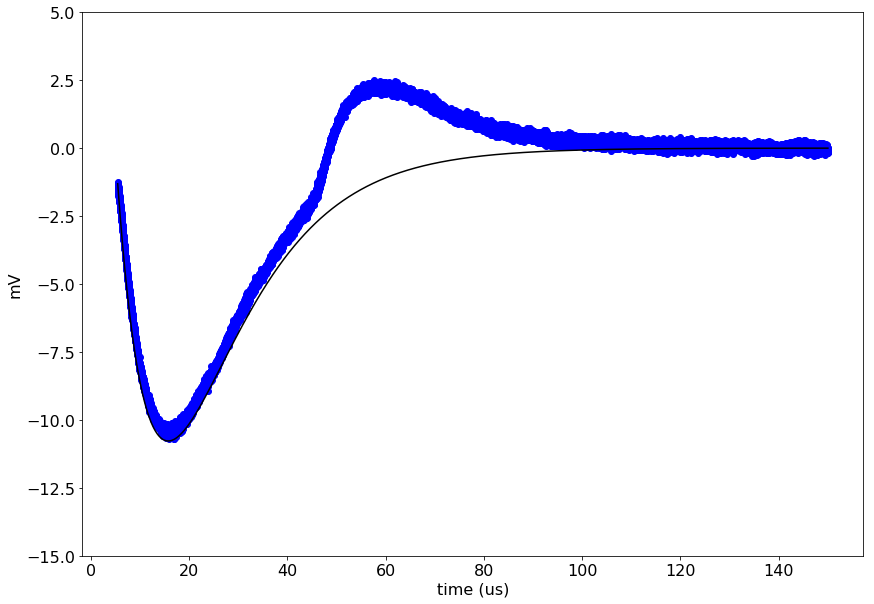

In [712]:
now = datetime.datetime.now()
datetimeforplots=now.strftime("%Y%m%d_%H%M")
#print(datetimeforplots)

def func(t, A1, TD1, TR1, TF1, A2, TD2, TR2, TF2,C):
    res = A1* np.exp(-TF1*(t-TD1))*(1-np.exp(-TR1*(t-TD1))) + A2 * np.exp(-TF2*(t-TD2))*(1 - np.exp(-TR1*(t-TD2))) + C
    return res

def newfunc(t,A, B):
    res = A* t+ B
    return res

def single(t, A1, TD1, TR1, TF1):
    res = A1* np.exp(-TF1*(t-TD1))*(1-np.exp(-TR1*(t-TD1)))
    return res


t0 = 5.5
t1 = 150

df = FitData[(FitData.time>t0)&(FitData.time<t1)]

#popt, pcov = curve_fit(newfunc, df.time, df.logadj)#, p0 = [-0.1,2], bounds = [[-.5,0],[0,2]])
#print (popt)
#print (pcov)

#popt = [30.0, .1 ,2]
#ax=plt.scatter(df.time,df.logadj)#,label= vlabelshort)
xfit = np.linspace(t0,t1,len(df.time))

#A1, TR1, TF1, A2, TD, TR2, TF2,C)


#plt.ylim(-20,5)


#if voltage ==2:
#    stau = [[voltage,popt[1],pcov[1,1]]]
#else:
#    stau = np.append(stau, [[voltage,popt[1],pcov[1,1]]], axis=0)
#print (stau)
#        tau = np.append(tau, stau, axis=0)

#tau =  '%s' % float('%.3g' % popt[1])
#tauerr=  '%s' % float('%.3g' % pcov[1,1])
       
        
#plt.savefig('CompareRisetimes_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')
#print (stau)
#plt.errorbar(stau[:,0],stau[:,1]*1000,yerr=stau[:,2]*1000,fmt='o')
#plt.xlim([-.1,2])
#plt.ylim([30,120])
#plt.xlabel("Voltage")
#plt.ylabel('tau (ns)')
#plt.title('Risetimes Vs Voltage, HVS'+label)
#plt.legend().set_visible(False)
#print (tau)
#plt.savefig('RisetimeVsVoltage_HVS'+str(channel)+'_'+datetimeforplots+'.pdf')


#A1, TD1, TR1, TF1, A2, TD2, TR2, TF2,C)
plt.scatter(df.time,df.V_avg,c='b')

guessesA = [-55, 5, .05, 0.07]
plt.plot(xfit,single(xfit,*guessesA),color='k')

#guessesB = [0,5, 5e-5, 0.1, 1.7e4, 46, 5e-5, 0.1,0]
#plt.plot(xfit,func(xfit,*guessesB),color='r')

#sumguesses = [-55e4,t0, .5e-5, 0.1, 1.7e4, 46, 5e-5, 0.1,0]
#plt.plot(xfit,func(xfit,*sumguesses),color='g')


plt.ylabel('mV')
plt.xlabel('time (us)')
plt.ylim(-15,5)
#plt.savefig('cathodefit.png')
plt.show()


(0, 150)

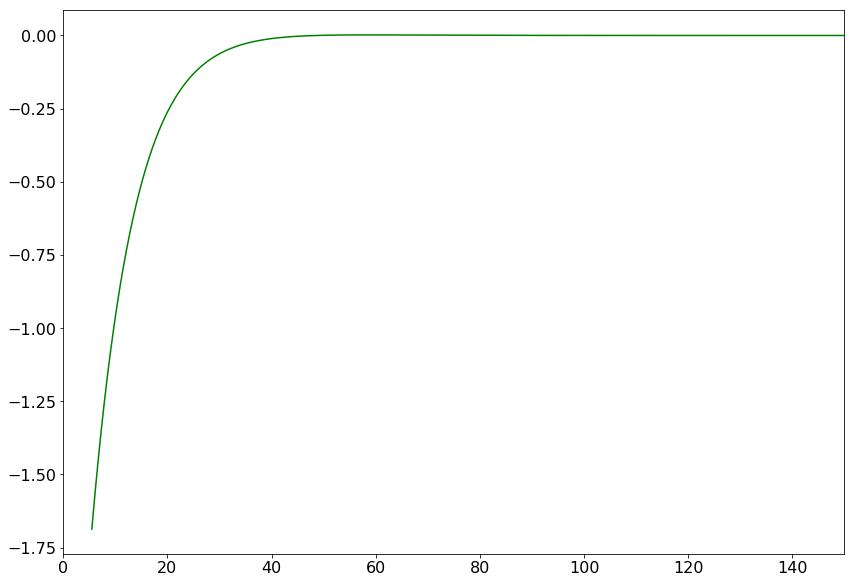

In [604]:
t0=5.5
t1=150
guessesB = [10,5, 5e-5, 0.1, 10, 49, 5e-5, 0.1,0]
x = np.linspace(t0,t1,len(df.time))
plt.plot(x,func(x,*guessesB),color='g')
plt.xlim(0,150)

In [571]:
len(xfit)

30104

(-15, 5)

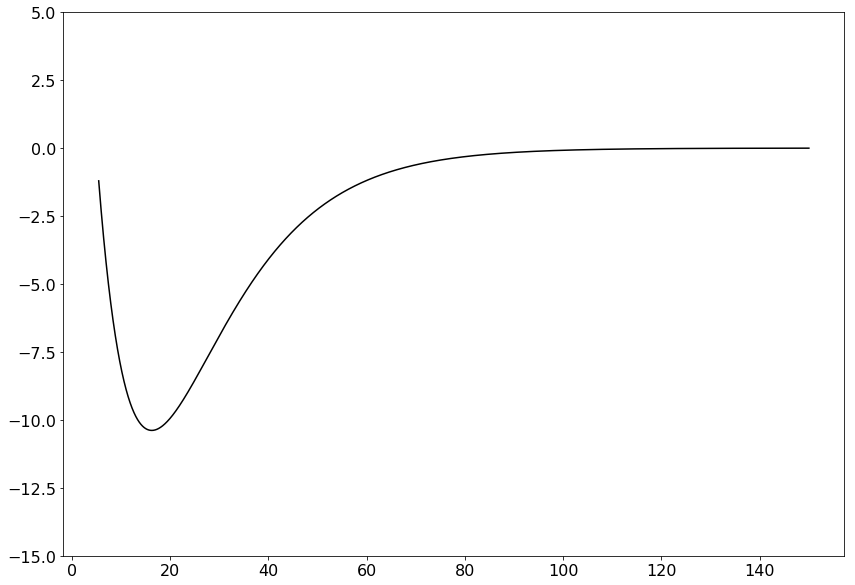

In [700]:
guessesA = [-63, 5, .04, 0.07]
cathodesignal = single(xfit,*guessesA)

plt.plot(xfit,cathodesignal,color='k')
plt.ylim(-15,5)

In [701]:
print(len(cathodesignal))
print(len(anodedf))
print(len(df))

anodedf.describe()

30104
21667
30104


,time,V
count,21667.000000,21667.000000
mean,97.999200,0.890414
std,30.023369,1.078221
min,46.000800,-0.292386
25%,72.000000,0.090270
50%,97.999200,0.328088
75%,123.998400,1.505128
max,149.997600,3.508007


Text(0.5,0,'time (us)')

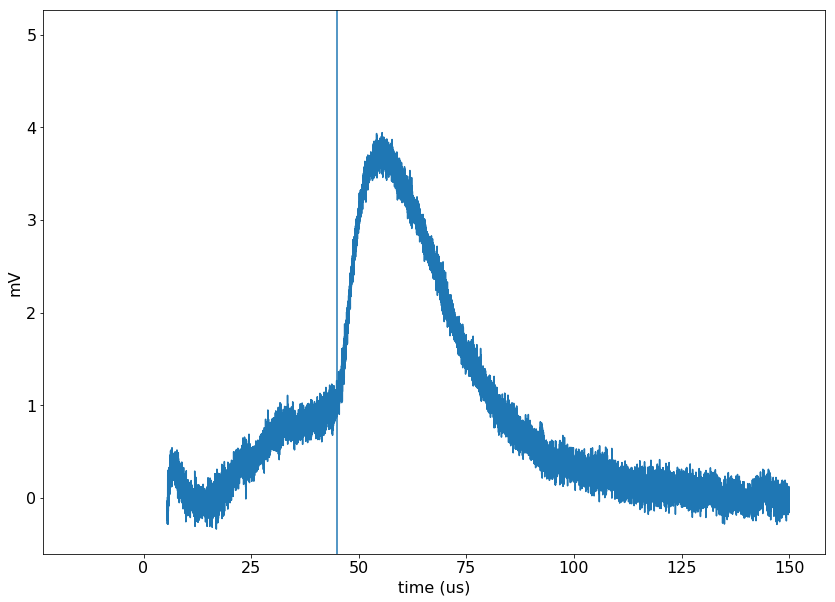

In [702]:
anodedf = pd.DataFrame(columns=['time','V'])
anodedf.time = df.time
anodedf.V = df.V_avg-cathodesignal
plt.plot(anodedf.time,anodedf.V)
plt.plot(-15,5)
plt.axvline(45)
plt.ylabel('mV')
plt.xlabel('time (us)')
#plt.savefig('dataminuscathode.png')


Text(0,0.5,'mV')

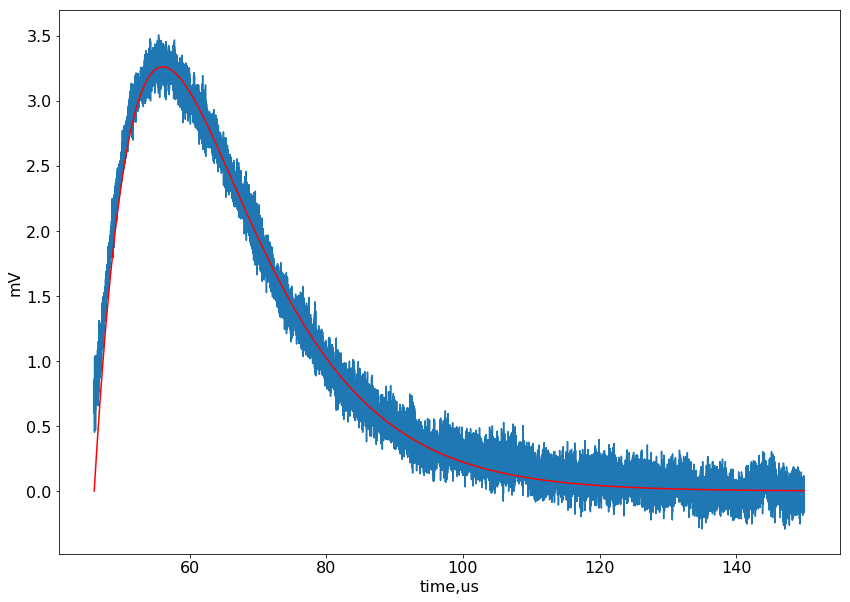

In [618]:
at0 = 46
anodedf=anodedf[anodedf.time>at0]
plt.plot(anodedf.time,anodedf.V)

guessesB = [98,at0, .009, 0.095, 0, at0,.009, 0.095,0]
anodefit = func(anodedf.time,*guessesB)
plt.plot(anodedf.time,anodefit,color='r')
plt.xlabel('time,us')
plt.ylabel('mV')
#plt.savefig('anodefit.png')

In [427]:
anodemax = anodedf.loc[anodedf['V'].idxmax()]
anodemax

time    55.432800
V        3.304833
Name: 63632, dtype: float64

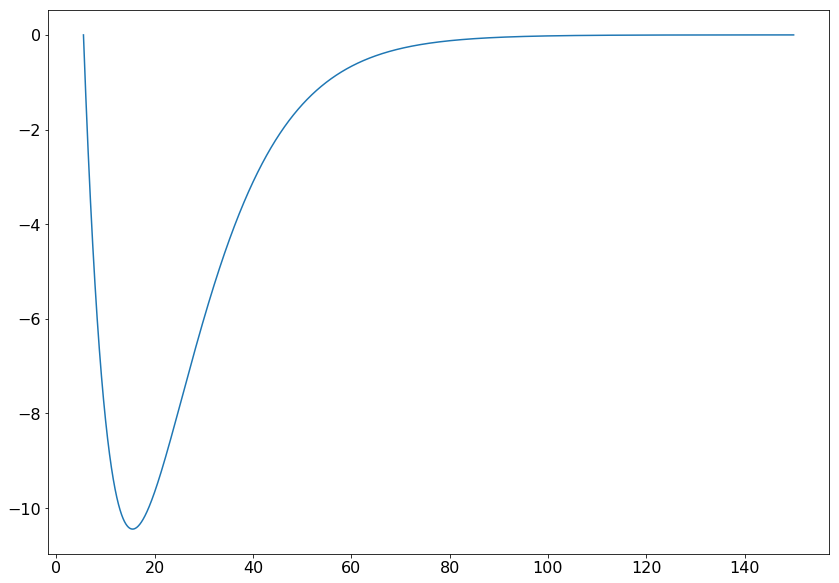

In [467]:
df = FitData[(FitData.time>t0)&(FitData.time<t1)]

cathodedf = pd.DataFrame(columns=['time','V'])
cathodedf['time'] = df.time
cathodedf['V'] = cathodesignal

plt.plot(cathodedf.time,cathodedf.V)

In [619]:
print('----CATHODE----')
print('time of start: %.2f'%(t0))
minV = cathodedf.loc[cathodedf['V'].idxmin()][1]
input = cathodedf.loc[cathodedf['V'].idxmin()][1]
dfsort = cathodedf.iloc[(cathodedf['V']-input).abs().argsort()[:1]].reset_index()
mint = dfsort.time[0]
print('time of min: %.2f us'%(mint))

df = cathodedf[cathodedf.time<mint]
input = cathodedf.loc[cathodedf['V'].idxmin()][1] / 2
dfsort = df.iloc[(df['V']-input).abs().argsort()[:1]][0:].reset_index().drop('index',axis=1)
halfmin = dfsort.time[0]
print('time of half min: %.2f us'%(halfmin))

print('\n \n')
print('----ANODE----')
print('time of start: %.2f'%(at0))
maxV = anodedf.loc[anodedf['V'].idxmax()][1]
input = anodedf.loc[anodedf['V'].idxmax()][1]
dfsort = anodedf.iloc[(anodedf['V']-input).abs().argsort()[:1]].reset_index()
maxt = dfsort.time[0]
print('time of max: %.2f us'%(maxt))

df = anodedf[anodedf.time<maxt]
input = anodedf.loc[anodedf['V'].idxmax()][1] / 2
dfsort = df.iloc[(df['V']-input).abs().argsort()[:1]][0:].reset_index().drop('index',axis=1)
halfmax = dfsort.time[0]
print('time of half max: %.2f us'%(halfmax))

----CATHODE----
time of start: 5.50
time of min: 15.50 us
time of half min: 7.82 us

 

----ANODE----
time of start: 46.00
time of max: 55.43 us
time of half max: 48.02 us


Text(25.5,2.6,'40.200')

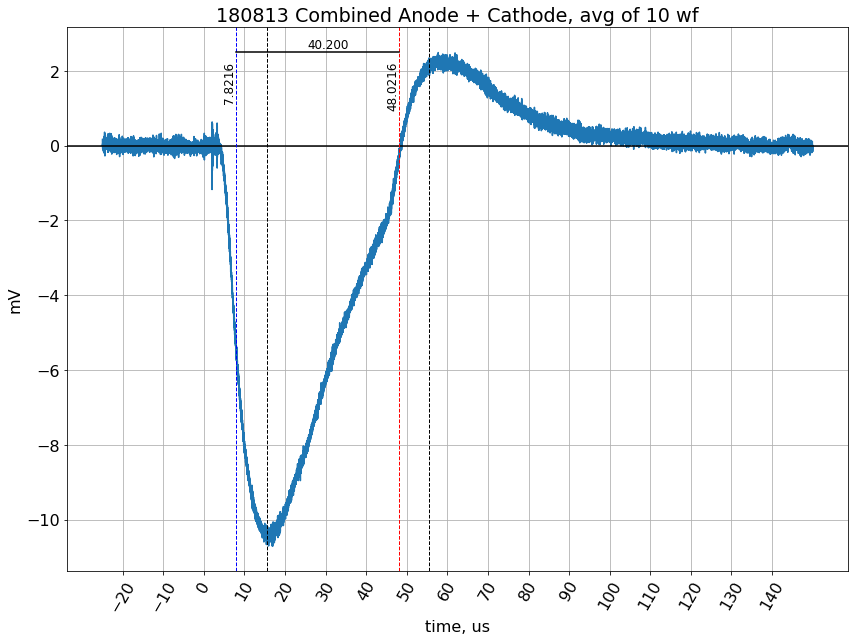

In [620]:
plt.plot(data.time,data.V_avg)
#plt.plot(data.time,data.V_1)
plt.axhline(data[data.time<0].V_avg.median(),c='k')
plt.xlabel('time, us')
plt.ylabel('mV')
plt.title('180813 Combined Anode + Cathode, avg of 10 wf')
plt.xticks(np.arange(-20, 150, step=10),rotation=60);
plt.grid();
plt.savefig('combined_anode_cathode.png')

plt.axvline(mint,c='k',ls='--',lw=1)
plt.axvline(halfmin,c='b',ls='--',lw=1)
plt.text(halfmin-3,2,str(halfmin),size=12,rotation=90)

plt.axvline(maxt,c='k',ls='--',lw=1)
plt.axvline(halfmax,c='r',ls='--',lw=1)
plt.text(halfmax-3,2,str(halfmax),size=12,rotation=90)

plt.plot([halfmin,halfmax],[2.5,2.5],c='k')
plt.text((halfmax-halfmin)/2 +5.4,2.6,'%.3f'%(halfmax-halfmin),size=12)

#plt.savefig('everythingtogether.png')

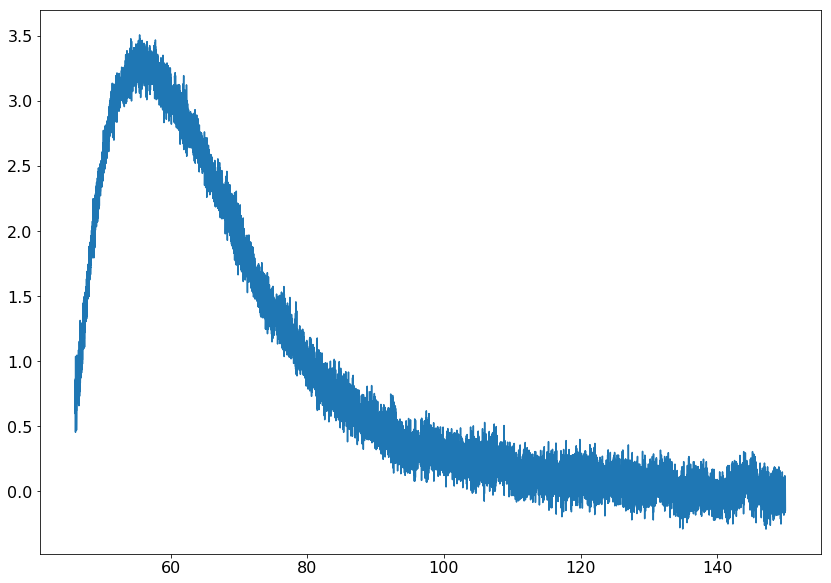

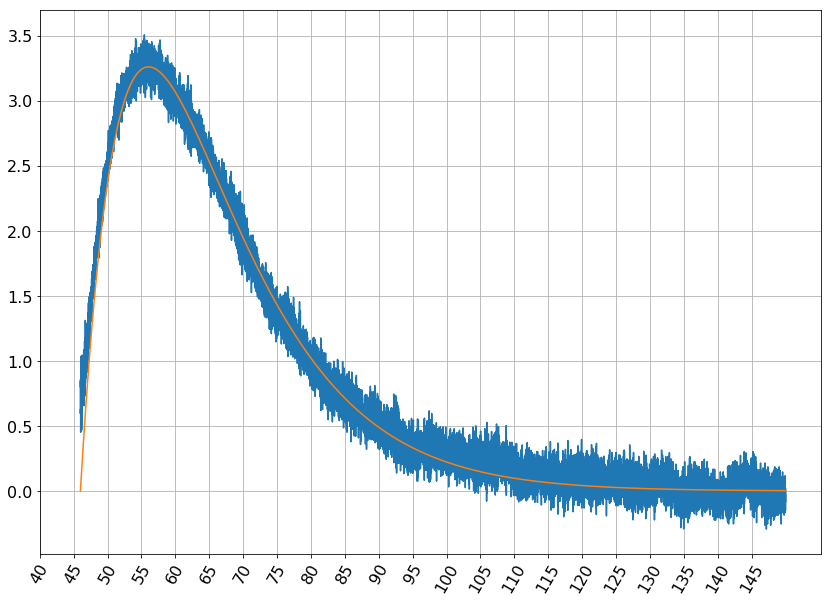

In [637]:
#def single(t, A1, TD1, TR1, TF1):
guessesB = [98, at0, .009, 0.095]
anodefit = single(anodedf.time,*guessesB)
plt.plot(anodedf.time,anodedf.V)
plt.plot(anodedf.time,anodefit)
plt.grid()
plt.xticks(np.arange(40, 150, step=5),rotation=60);


In [639]:

#def single(t, A1, TD1, TR1, TF1):
df = anodedf
popt, pcov = curve_fit(single, df.time, df.V, p0 = [1,46,0.01,0.1])#, bounds = [[-.5,0],[0,2]])


[18.04273814 45.49517351  0.04957955  0.0768762 ]


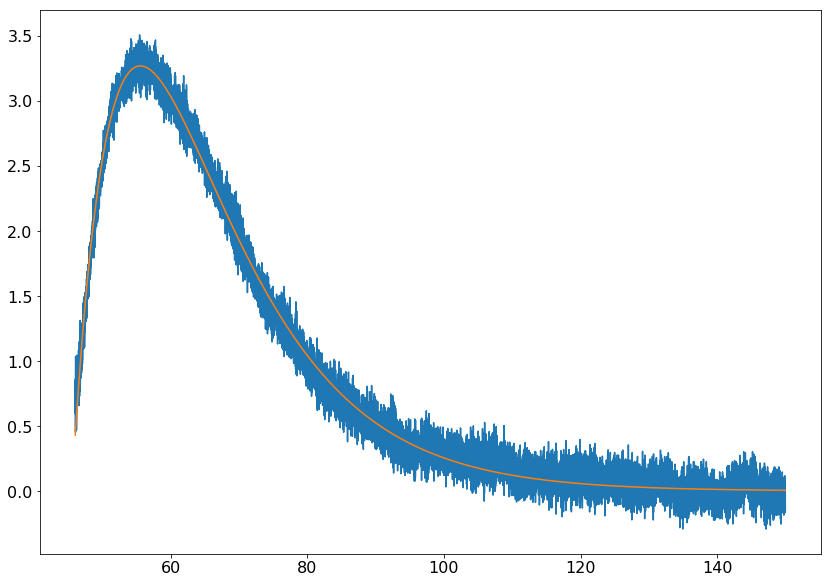

In [641]:
anodefit = single(anodedf.time,*popt)
plt.plot(anodedf.time,anodedf.V)
plt.plot(anodedf.time,anodefit)
print(popt)

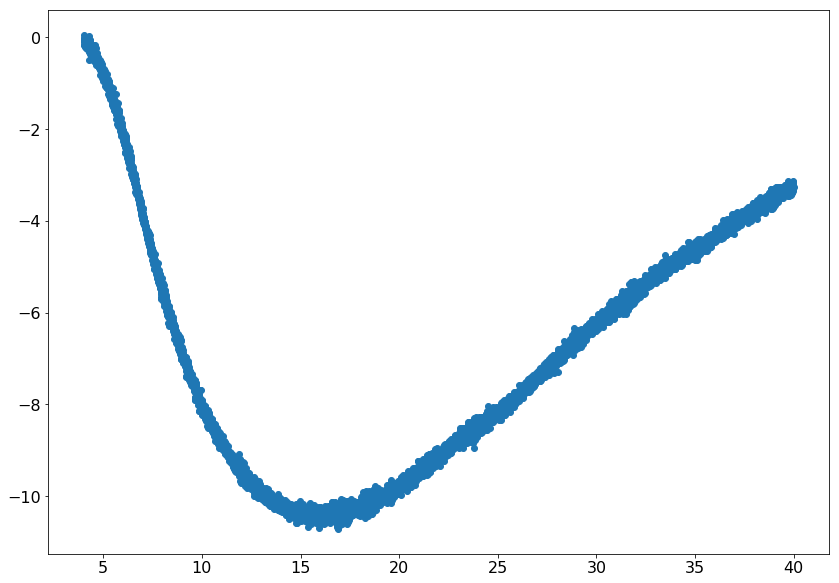

In [759]:
t0 = 4
t1 = 150

ta1 = 40
ta2 = 120

df = FitData[(FitData.time>t0)&(FitData.time<t1)]
df = df[(df.time<ta1)]# | (df.time>ta2)]
plt.scatter(df.time,df.V_avg)

In [761]:
popt, pcov = curve_fit(single, df.time, df.V_avg, p0 =[-55, 5, .05, 0.07], bounds = [[-60,4,0,0.06],[-40,6,0.07,0.09]])
print(popt)

[-6.00000000e+01  4.82553689e+00  4.31388803e-02  7.29529884e-02]


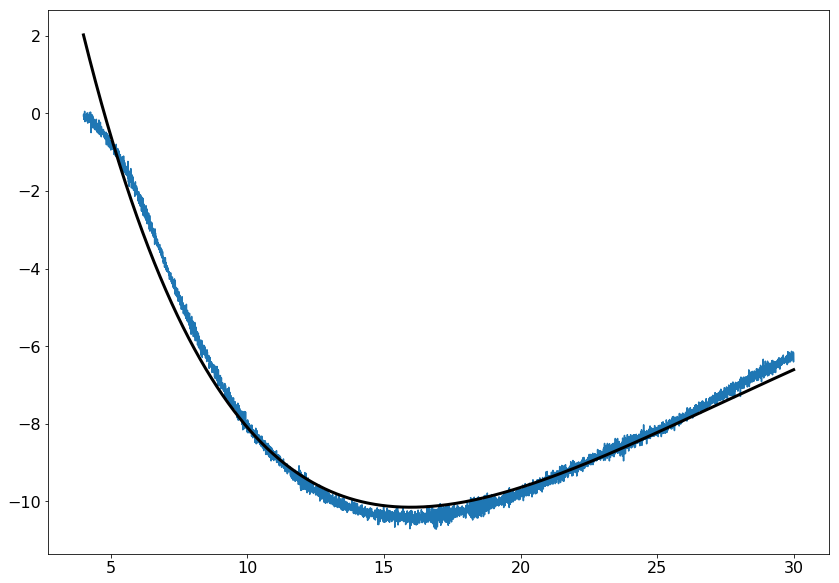

In [746]:
fit = single(df.time,*popt)
#plt.plot(df.time,df.V_avg)
df = FitData[(FitData.time>t0)&(FitData.time<t1)]
df = df[(df.time<ta1)]# | (df.time>ta2)]
plt.plot(df.time,df.V_avg)
#plt.plot(FitData.time,FitData.V_avg)
plt.plot(np.linspace(df.time.min(),df.time.max(),len(fit)),fit,c='k',lw=3)


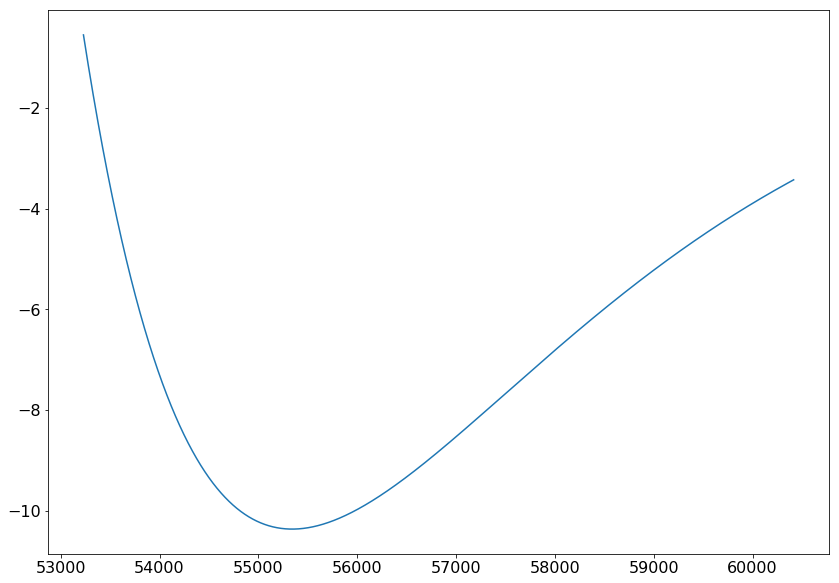

In [732]:
plt.plot(fit)

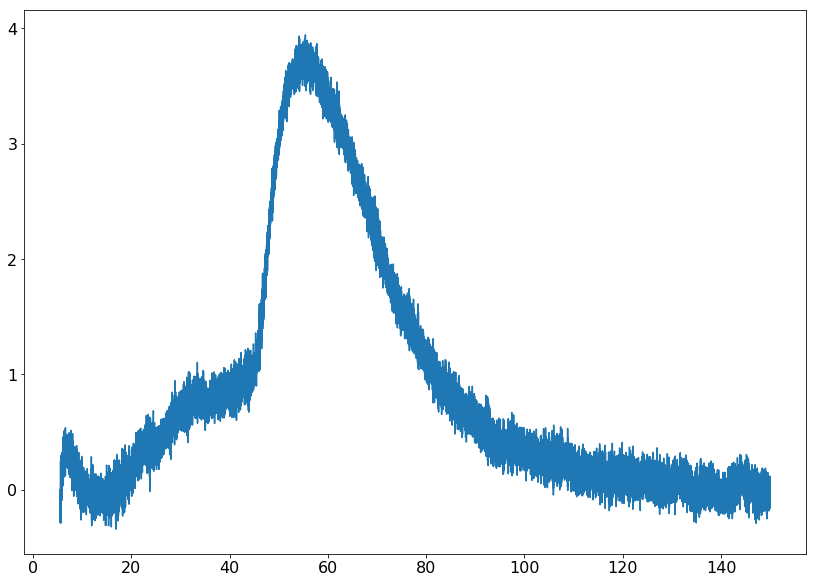

In [737]:
anodedf = pd.DataFrame(columns=['time','V'])
anodedf.time = df.time
anodedf.V = df.V_avg-cathodesignal
plt.plot(anodedf.time,anodedf.V)